# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
!pip install nb_black==1.0.5

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice) To reload it, use: %reload_ext nb_black
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

Mount drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Supervised_learning_logistics_regression/project_3/INNHotelsGroup.csv')

<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

The dtypes include objects, integers and floats.

In [ ]:
cust_booking_data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

There is no missing data in the dataframe

In [ ]:
cust_booking_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


<IPython.core.display.Javascript object>

In [ ]:
# Check for duplicates in the DataFrame
duplicates = cust_booking_data.duplicated()

# Count the number of duplicates
duplicate_count = duplicates.sum()

# Print the results
print("Duplicate Rows:")
print(duplicates)
print("\nNumber of Duplicate Rows:", duplicate_count)

Duplicate Rows:
0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

Number of Duplicate Rows: 0


<IPython.core.display.Javascript object>

Duplicates does not exist in the datframe

In [ ]:
# view what are the values in object data types
obj_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in obj_columns:
    print(cust_booking_data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Visualisation & functions for histogram, boxplot & barcharts

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots for categorical and numerical variables

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

 # show the plot

<IPython.core.display.Javascript object>

In [ ]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

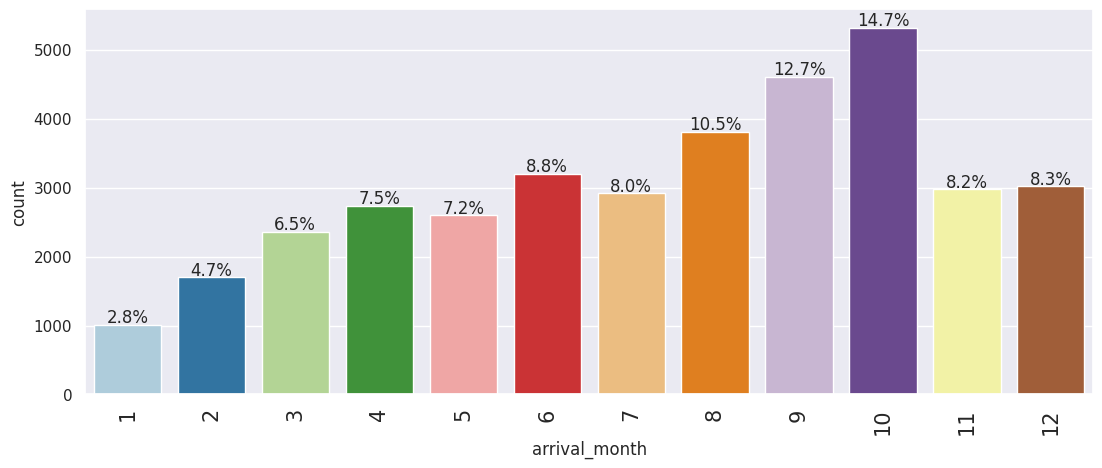

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(cust_booking_data, 'arrival_month', perc=True, n=None)

1. The busiest months are August, September, and October. October being the busiest.

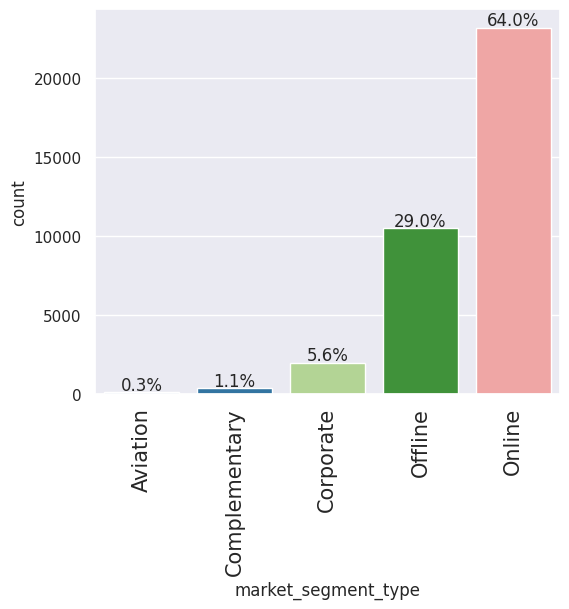

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(cust_booking_data, 'market_segment_type', perc=True, n=None)

2. The online market segment significantly comprise the guest.

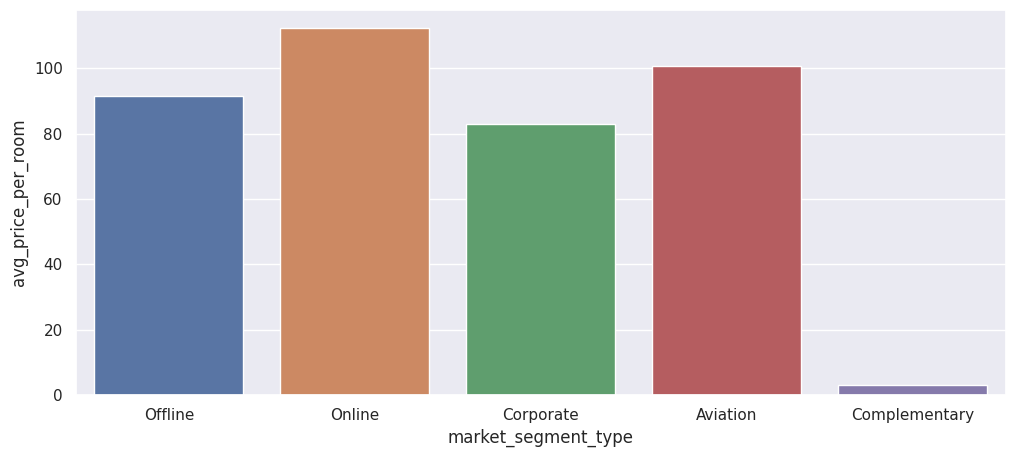

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=cust_booking_data, x="market_segment_type", y="avg_price_per_room", errorbar=('ci', False))
plt.show()

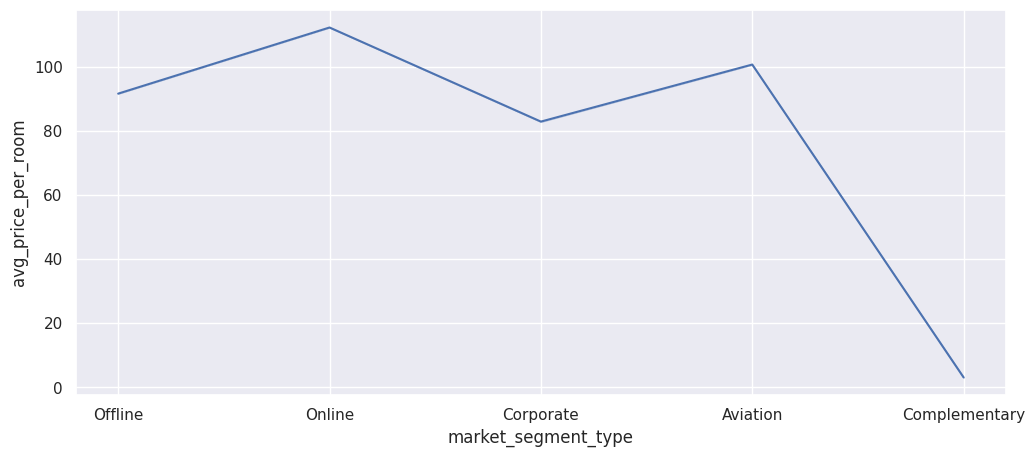

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=cust_booking_data, x="market_segment_type", y="avg_price_per_room", errorbar=('ci', False))
plt.show()

3. The hotel rates for online market segment are higher, followed by rates for aviation customers.

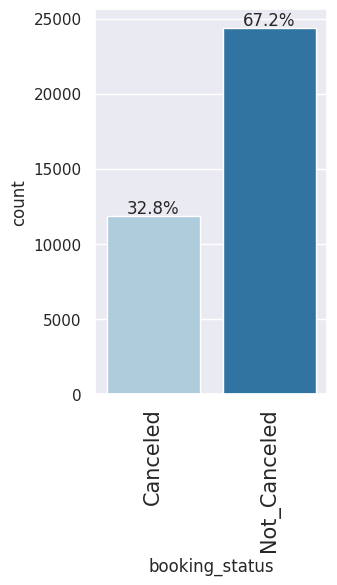

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(cust_booking_data, 'booking_status', perc=True, n=None)

4. About 33% of bookings were canceled.

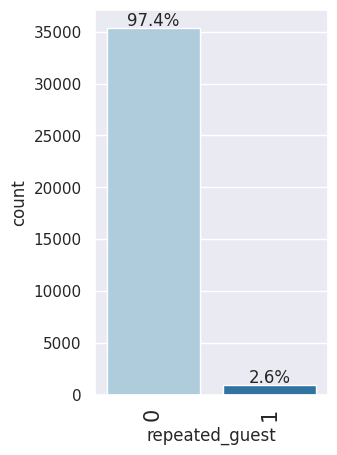

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(cust_booking_data, 'repeated_guest', perc=True, n=None)

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


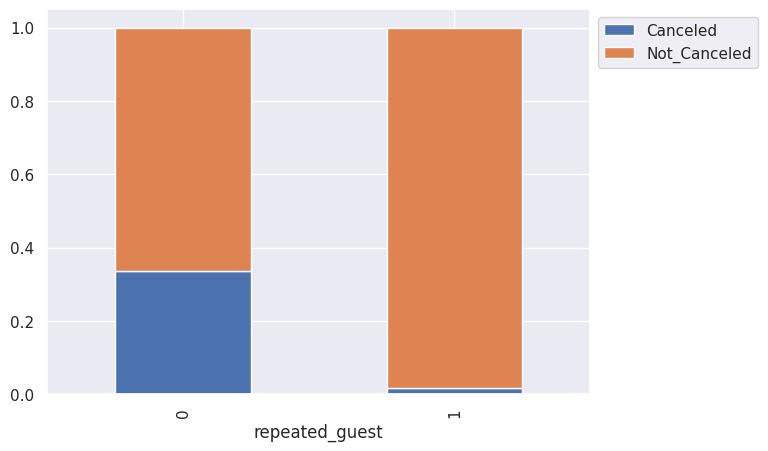

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(cust_booking_data,'repeated_guest','booking_status')

5. Less than 2% of repeating guest cancel their bookings.

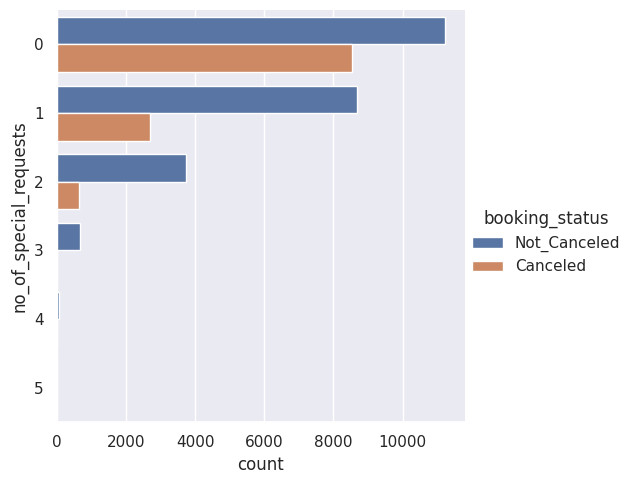

<IPython.core.display.Javascript object>

In [ ]:
sns.catplot(data=cust_booking_data, y='no_of_special_requests', hue='booking_status', kind='count' )

6. A significant number of guest without special requirements canceled their booking. Lack special request may affect booking status negatively.

## Univariate analysis

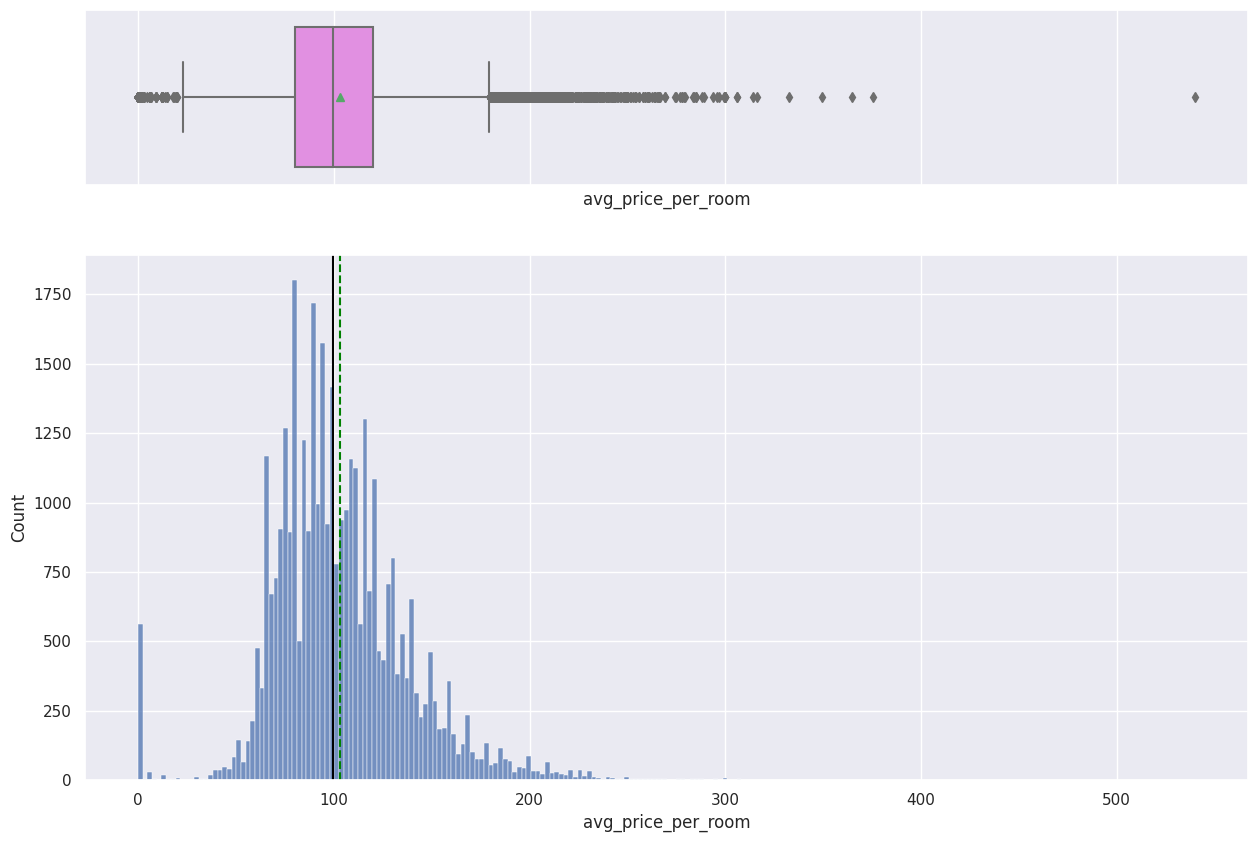

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable avg_price_per_room
histogram_boxplot(cust_booking_data, "avg_price_per_room")

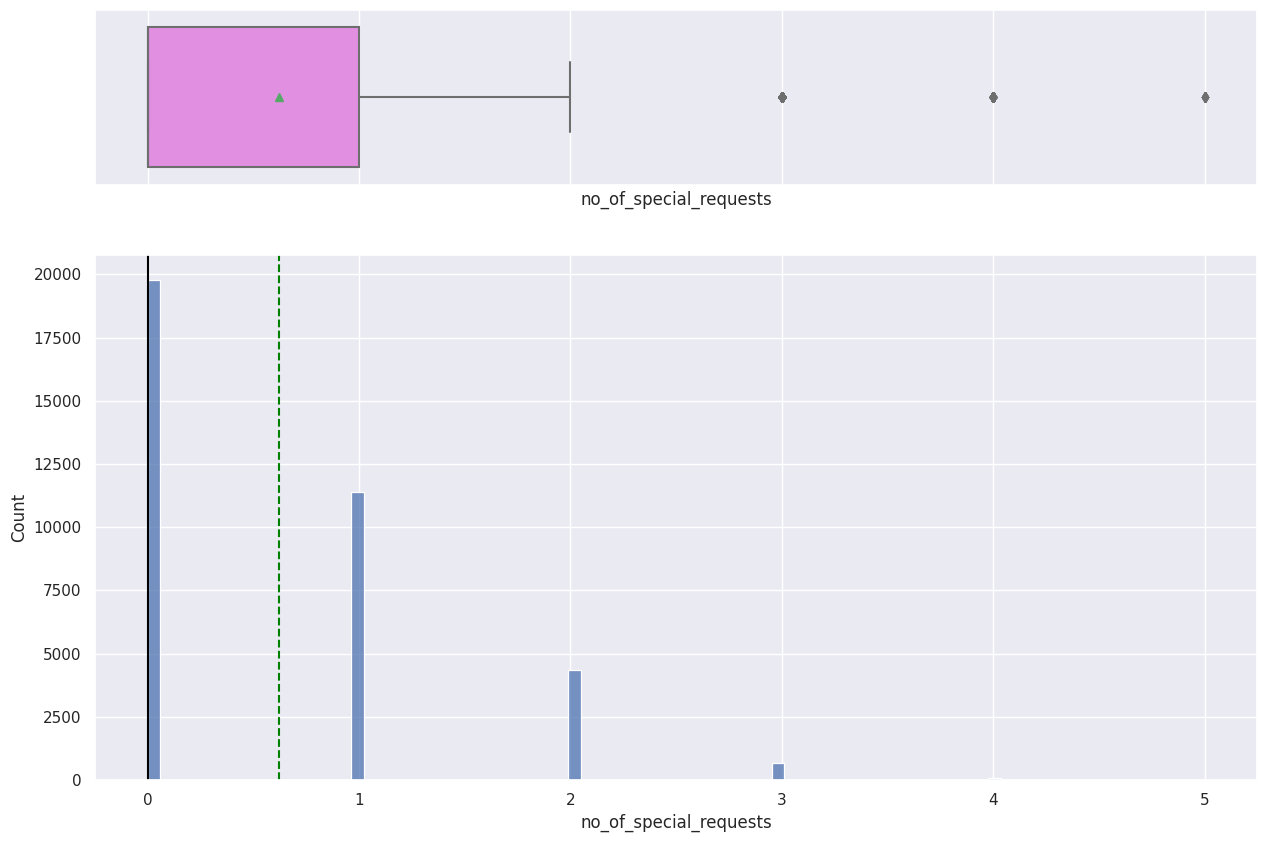

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable no_of_special_requests
histogram_boxplot(cust_booking_data, "no_of_special_requests")

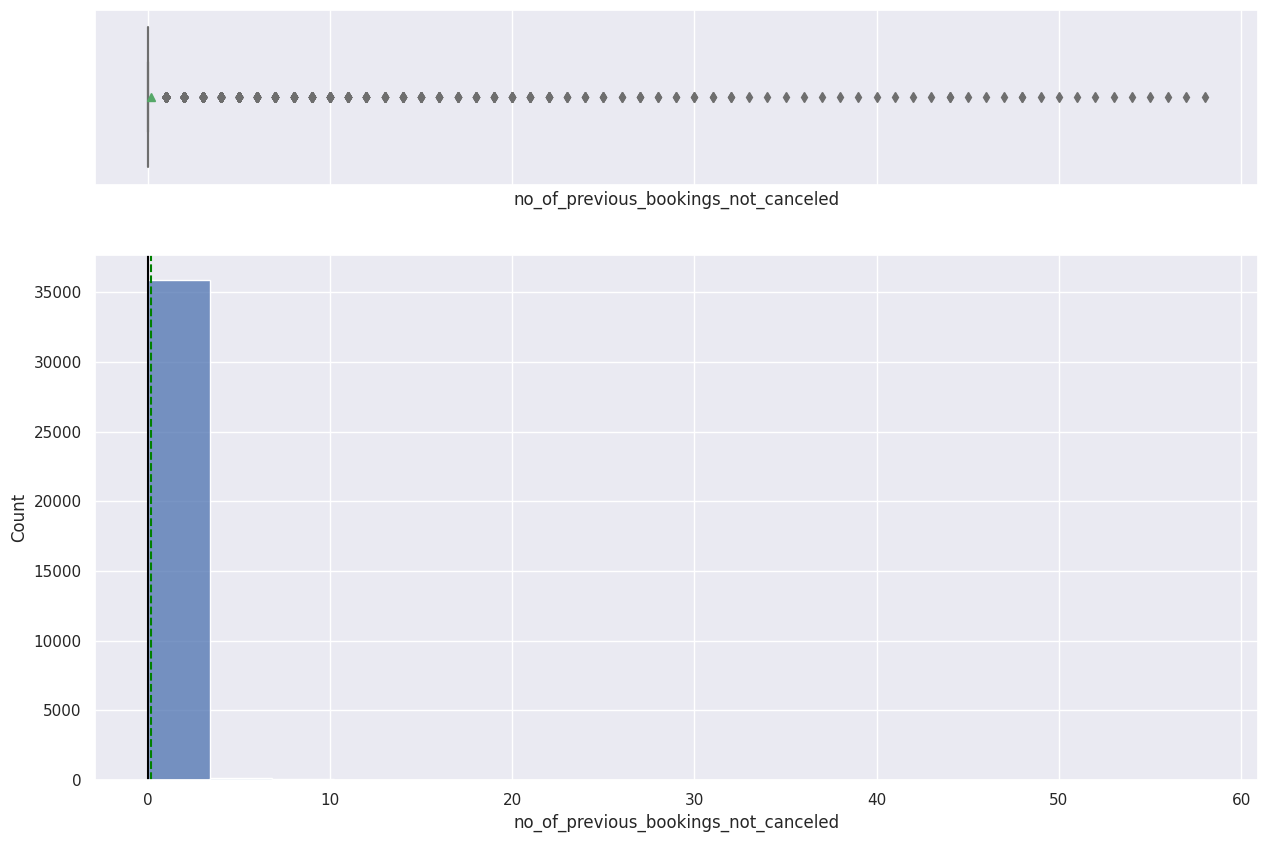

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable no_of_previous_bookings_not_canceled
histogram_boxplot(cust_booking_data, "no_of_previous_bookings_not_canceled")

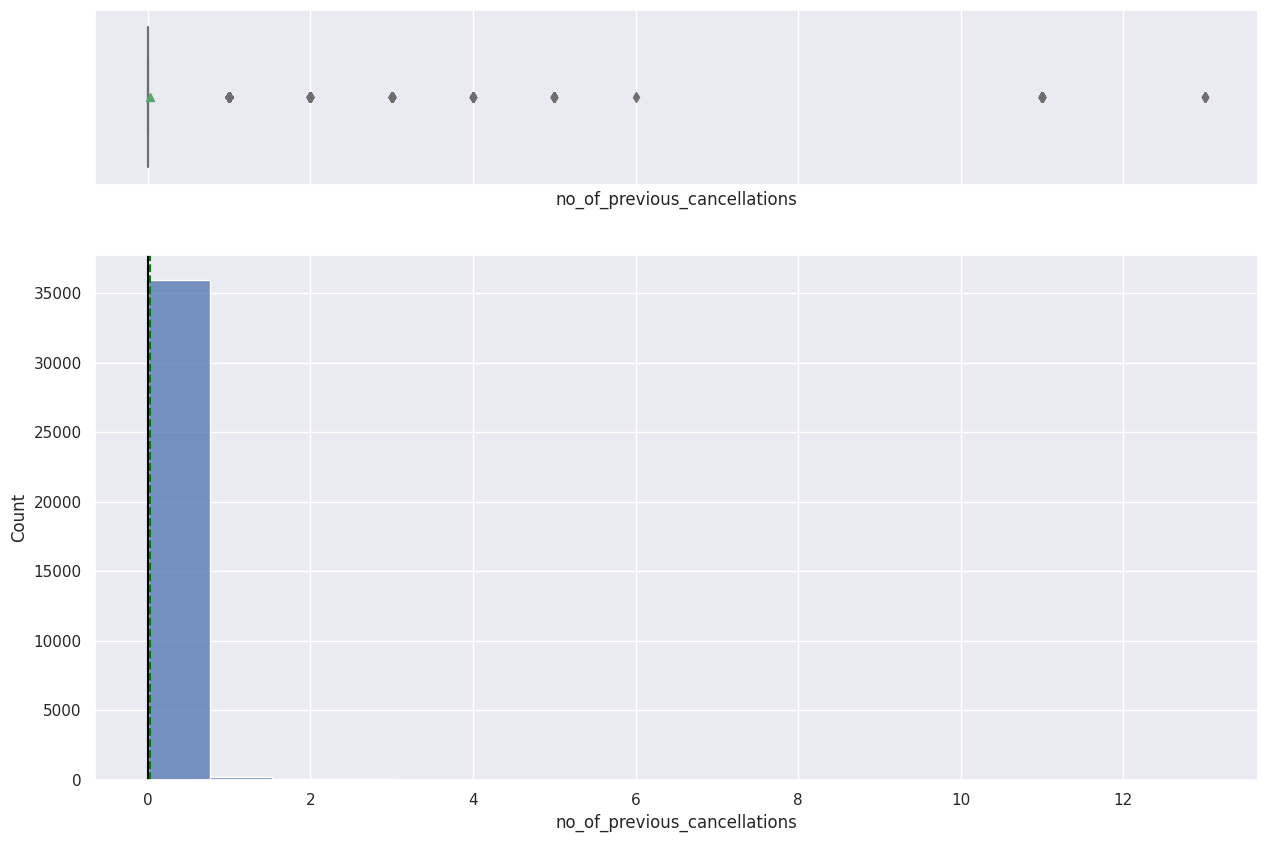

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable no_of_previous_cancellations
histogram_boxplot(cust_booking_data, "no_of_previous_cancellations")

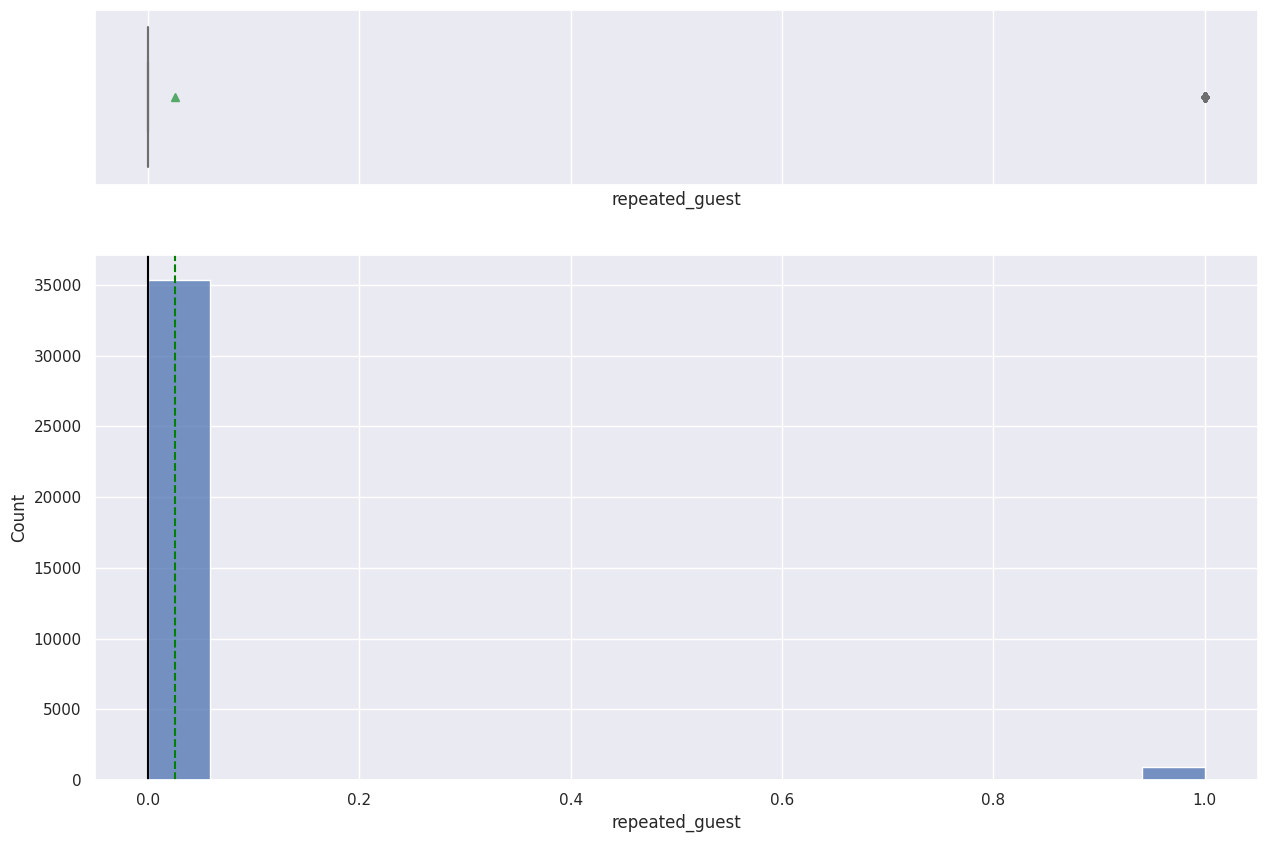

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable repeated_guest
histogram_boxplot(cust_booking_data, "repeated_guest")

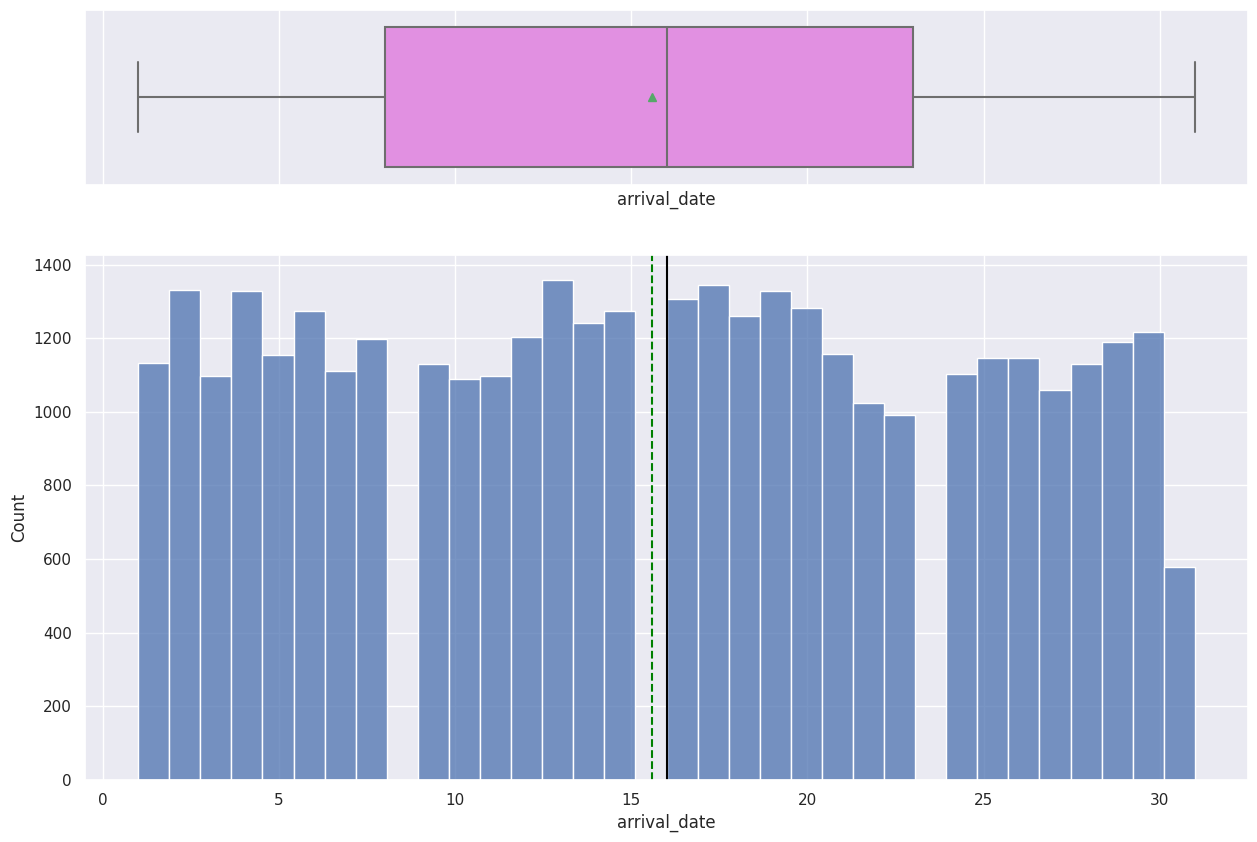

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable arrival_date
histogram_boxplot(cust_booking_data, "arrival_date")

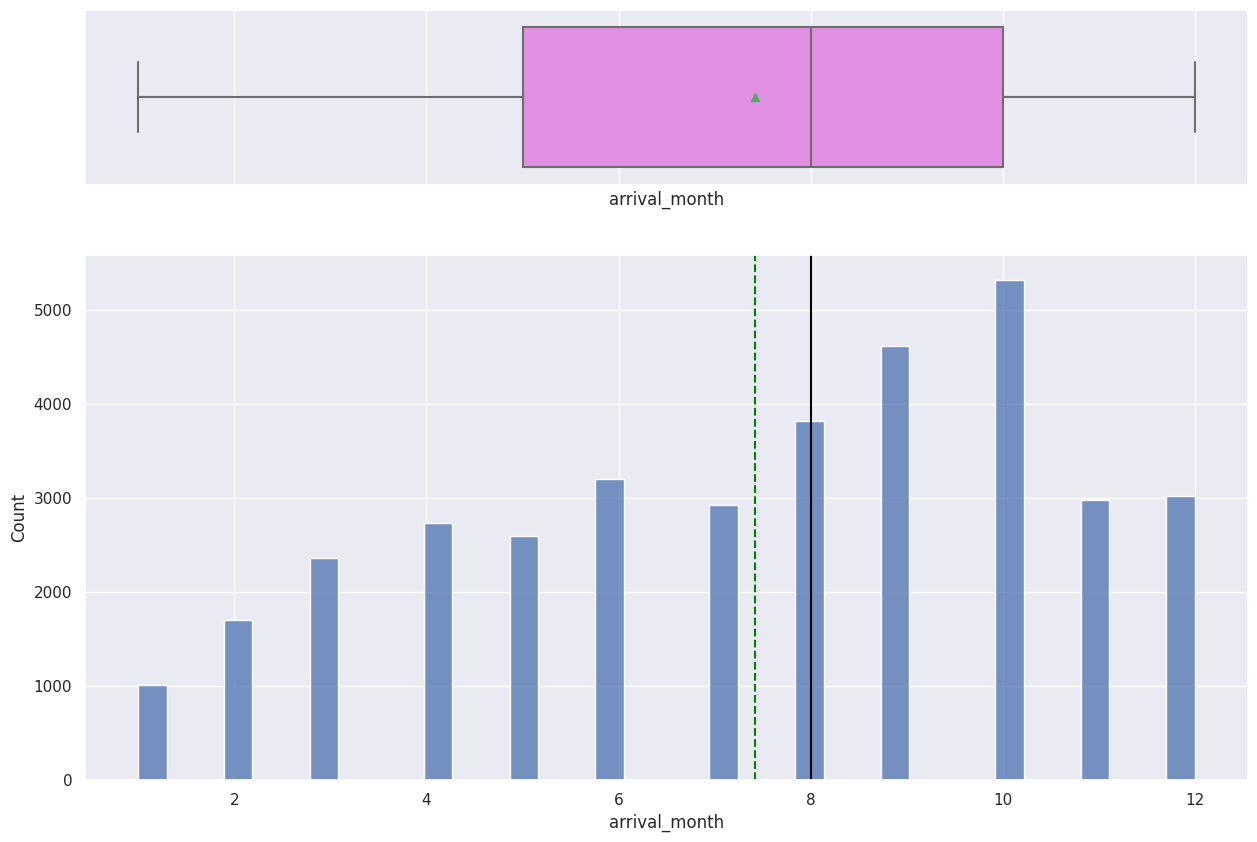

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable arrival_month
histogram_boxplot(cust_booking_data, "arrival_month")

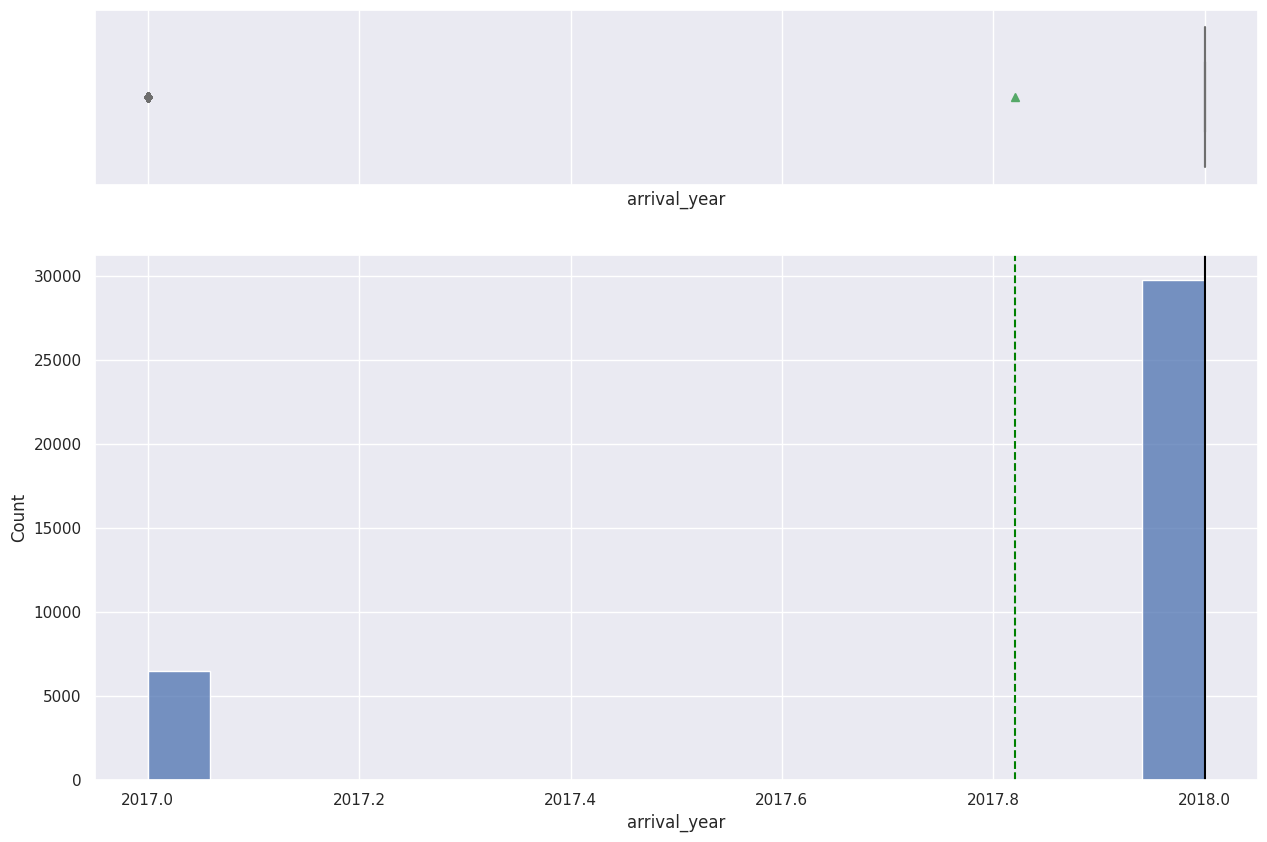

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable arrival_year
histogram_boxplot(cust_booking_data, "arrival_year")

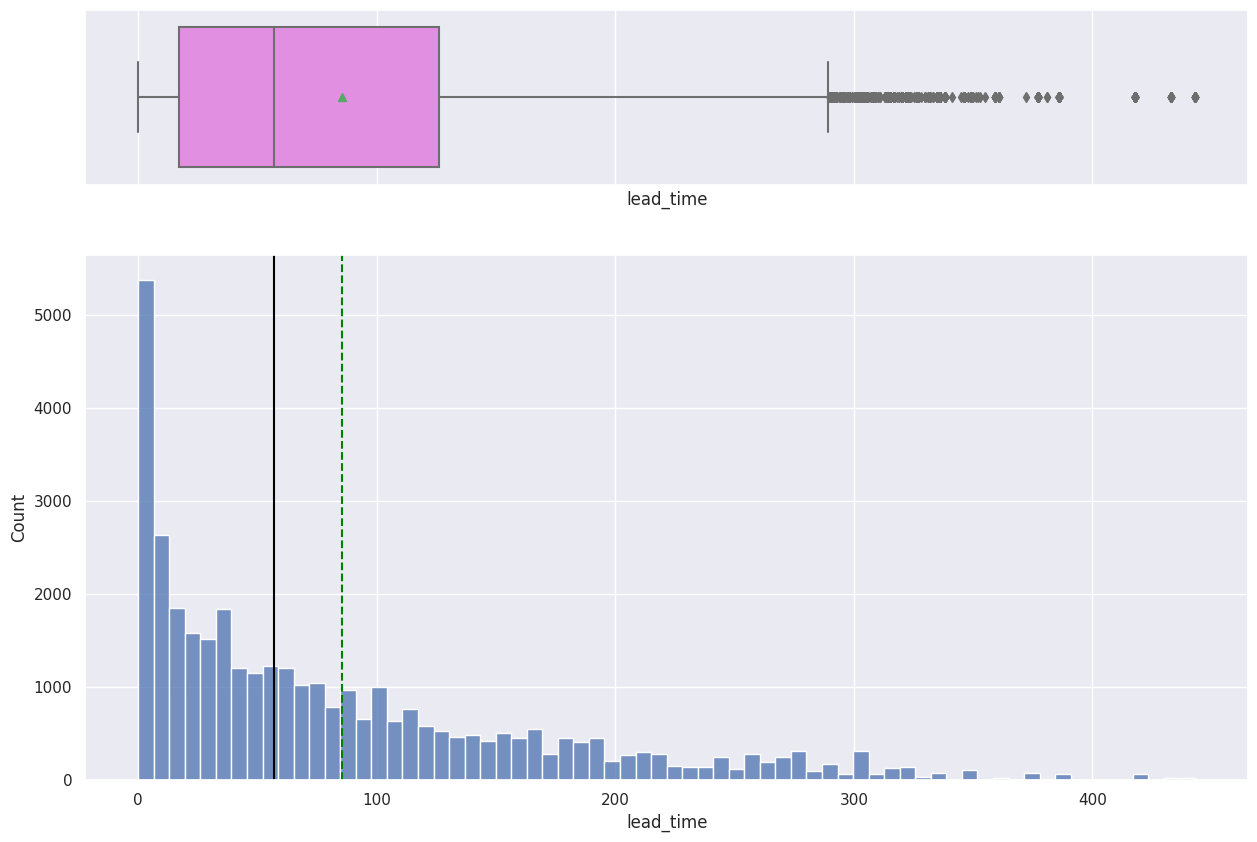

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable lead time
histogram_boxplot(cust_booking_data, "lead_time")

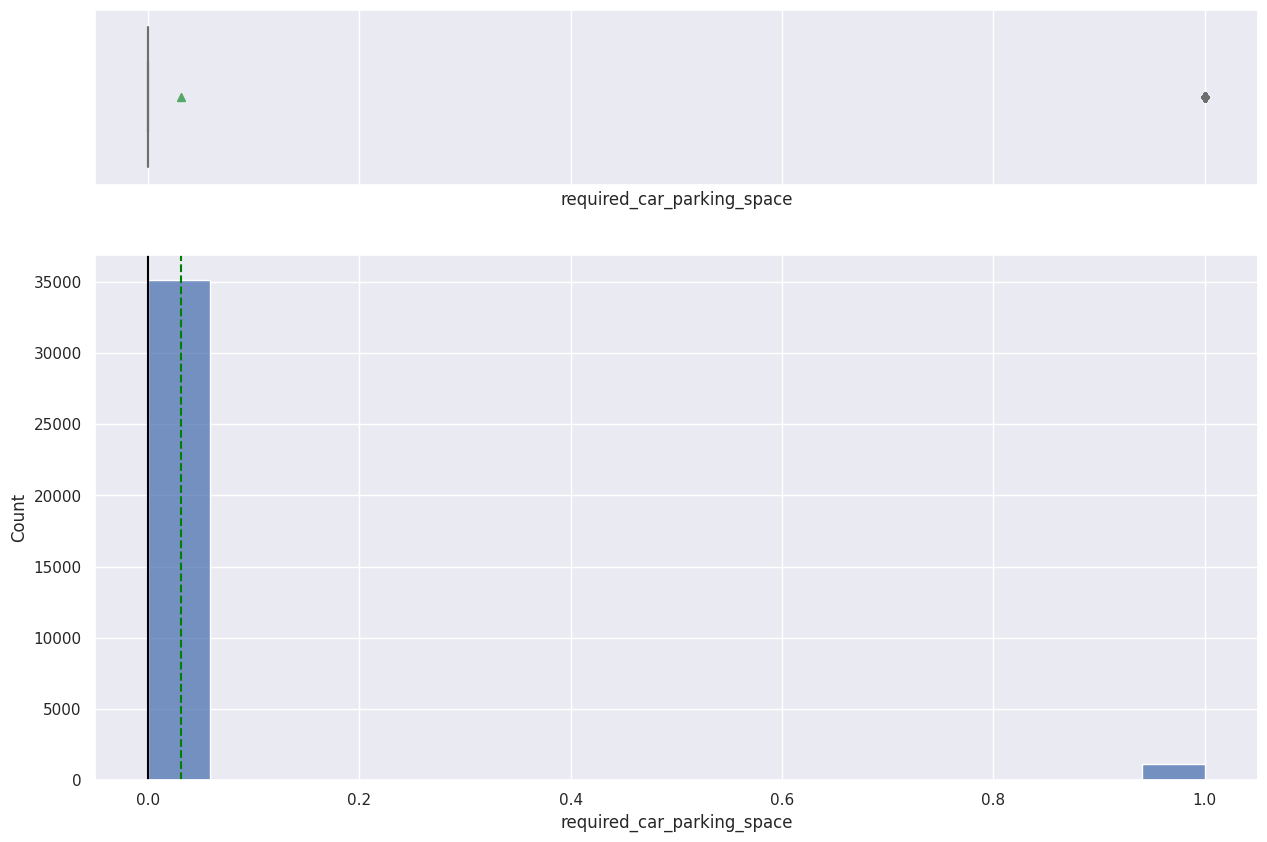

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable required_car_parking_space
histogram_boxplot(cust_booking_data, "required_car_parking_space")

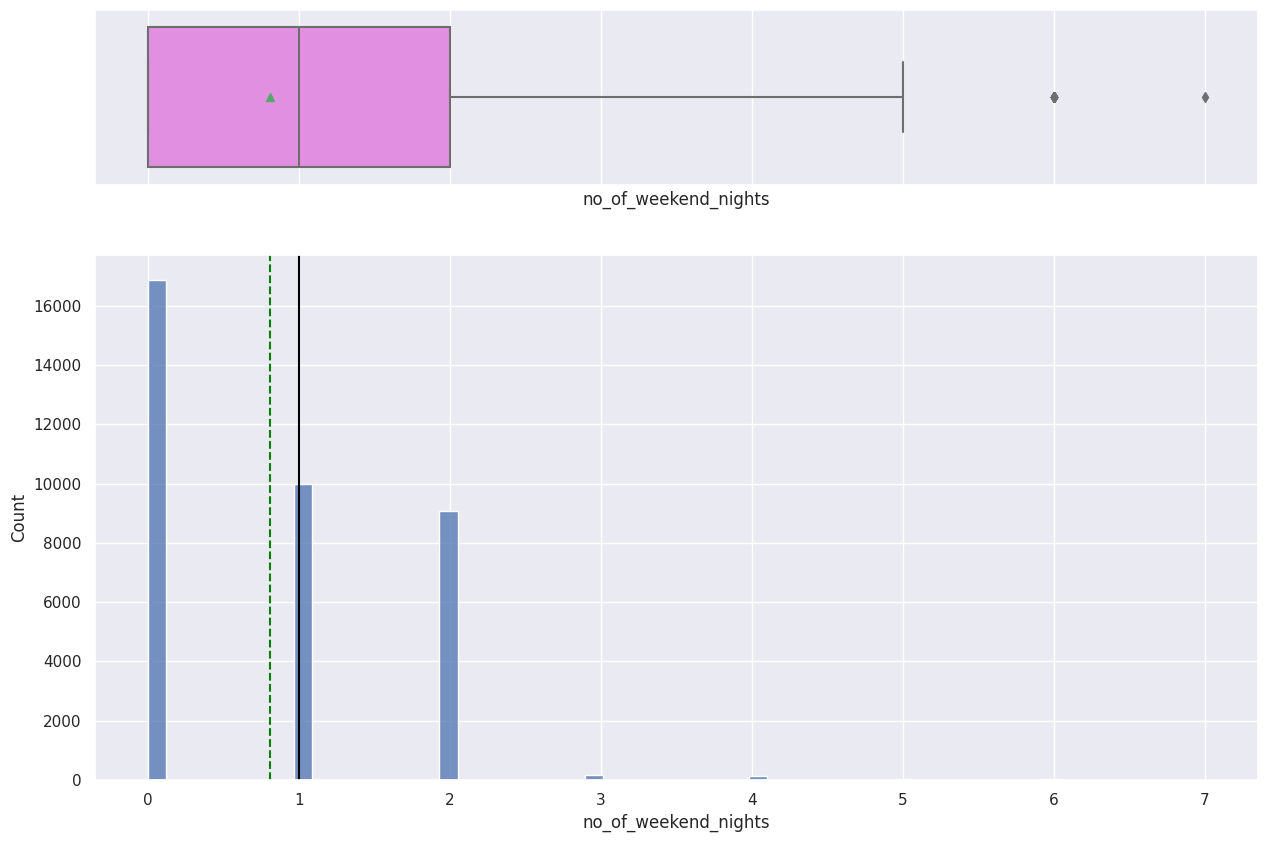

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable no_of_week_nights
histogram_boxplot(cust_booking_data, "no_of_weekend_nights")

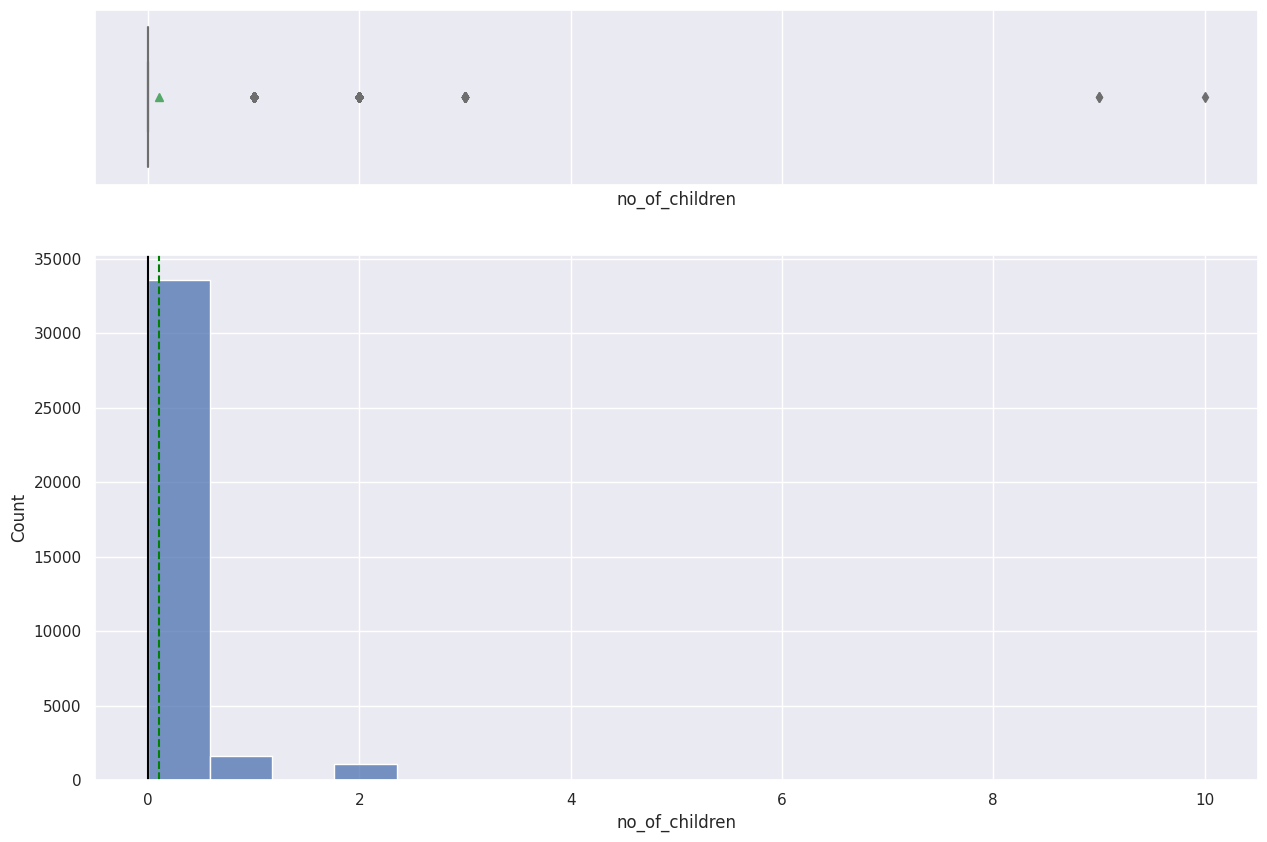

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable no_of_children
histogram_boxplot(cust_booking_data, "no_of_children")

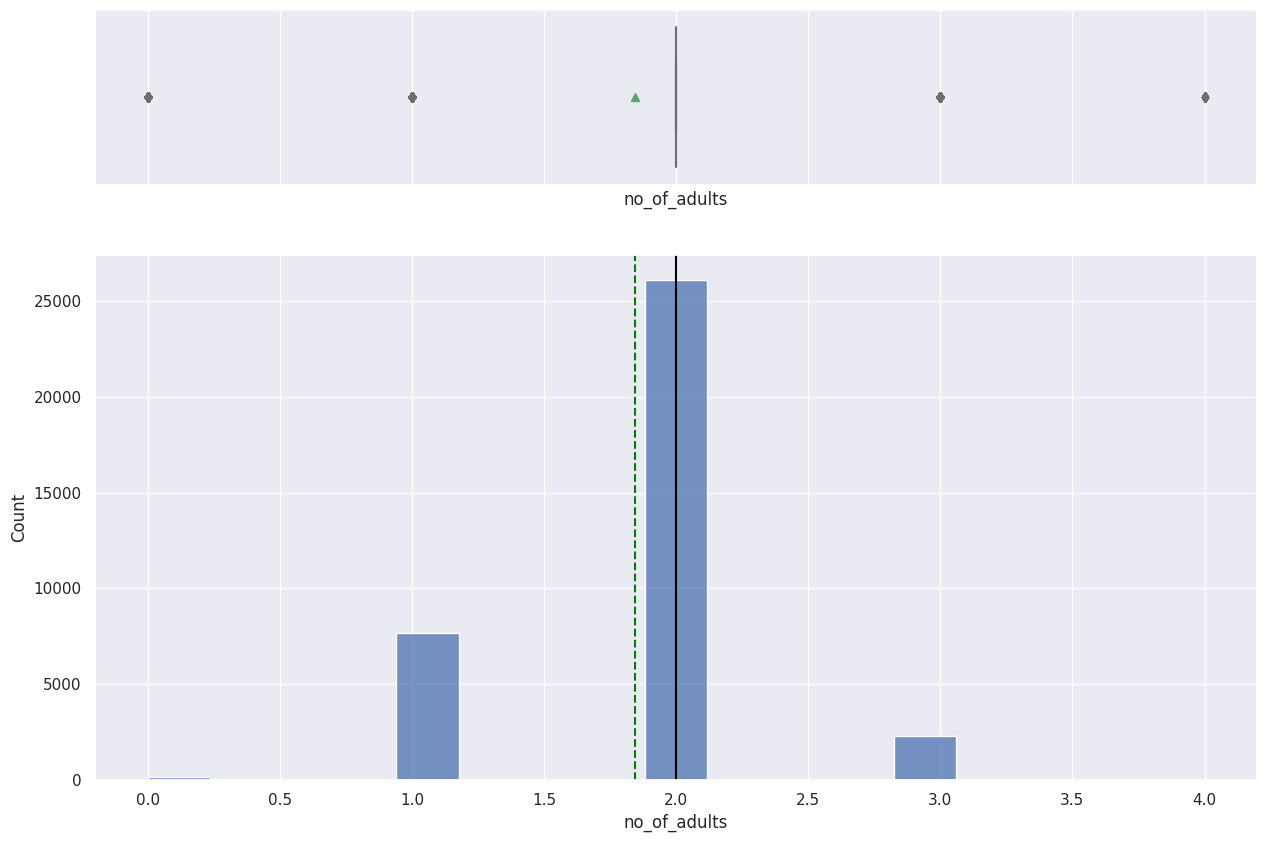

<IPython.core.display.Javascript object>

In [ ]:
#Exploring the dependent variable no_of_adult
histogram_boxplot(cust_booking_data, "no_of_adults")

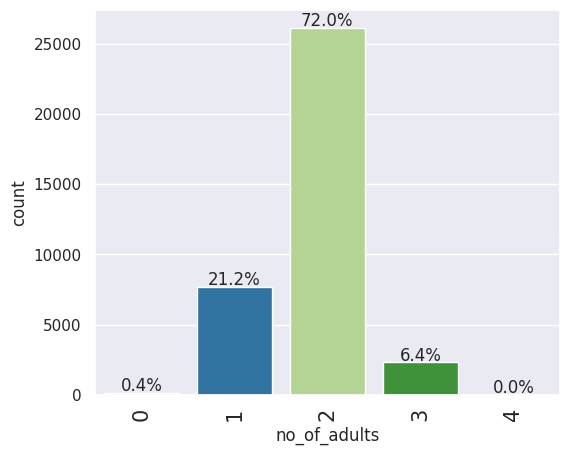

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of brand_name with percentage showing on each bar
labeled_barplot(cust_booking_data, "no_of_adults", perc=True)

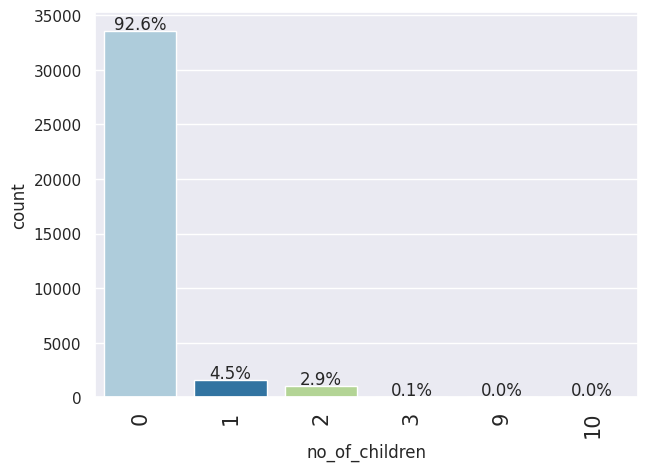

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "no_of_children", perc=True)

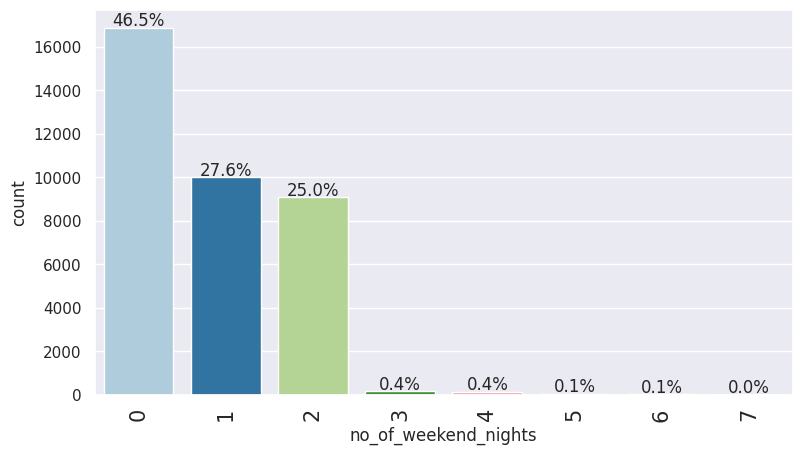

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "no_of_weekend_nights", perc=True)

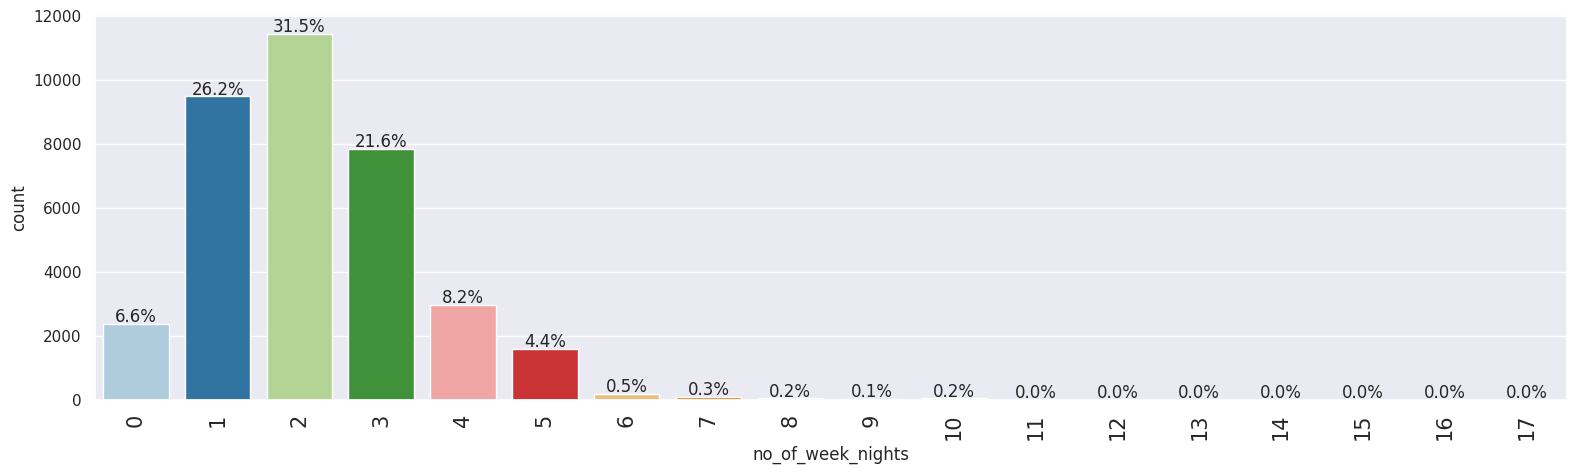

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "no_of_week_nights", perc=True)

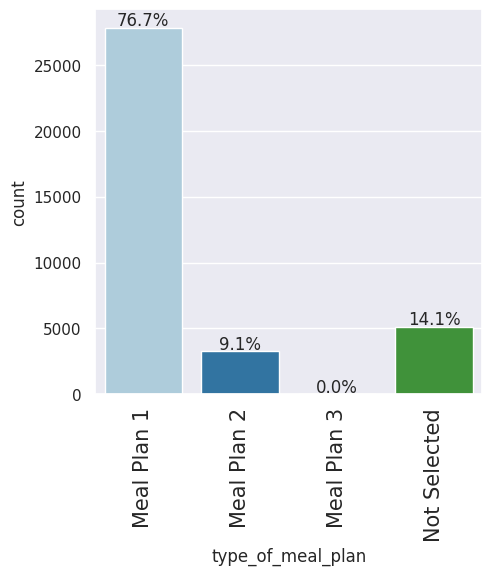

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "type_of_meal_plan", perc=True)

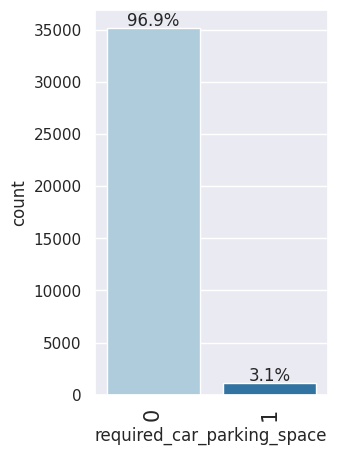

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "required_car_parking_space", perc=True)

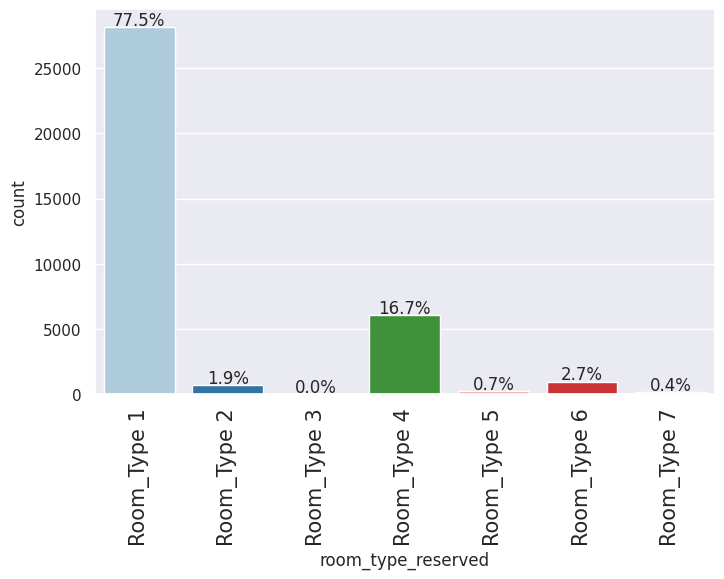

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "room_type_reserved", perc=True)

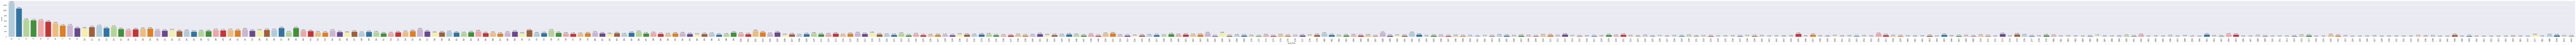

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "lead_time", perc=True)

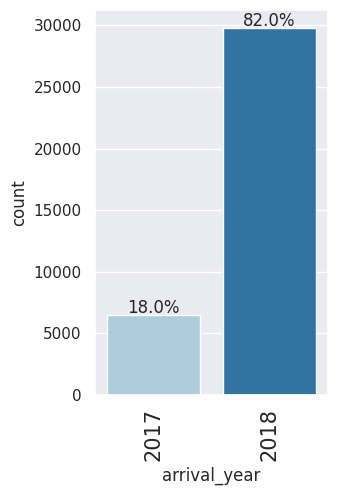

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "arrival_year", perc=True)

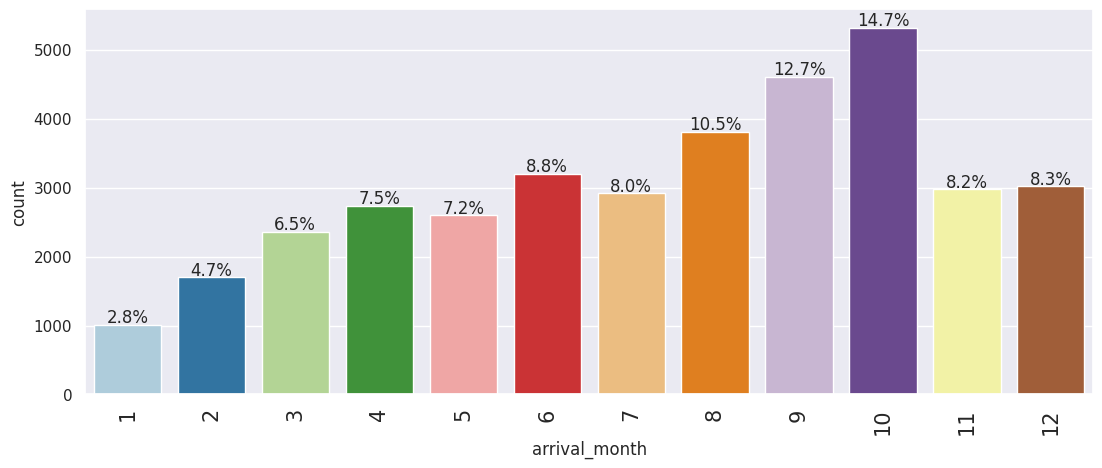

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "arrival_month", perc=True)

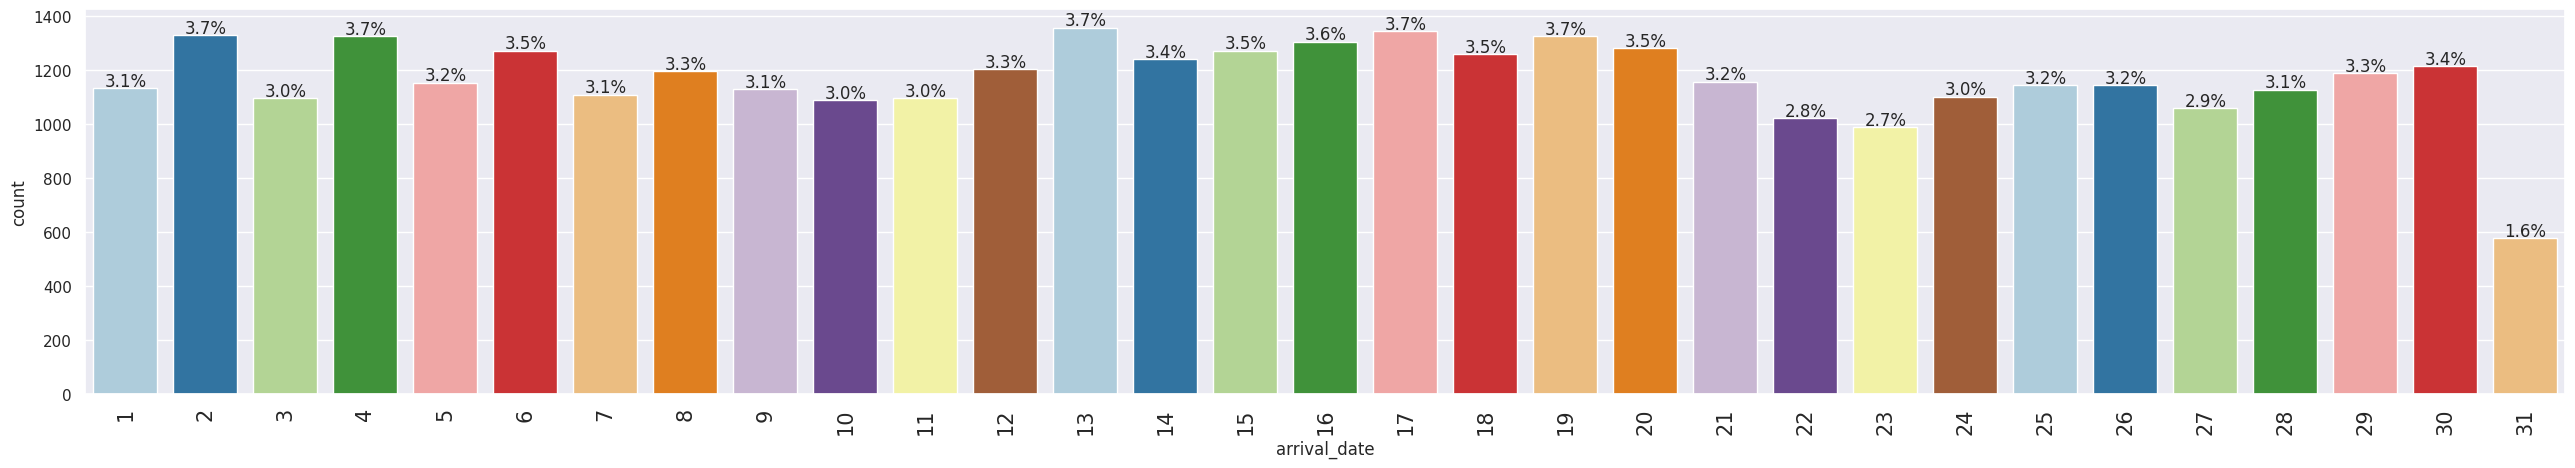

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "arrival_date", perc=True)

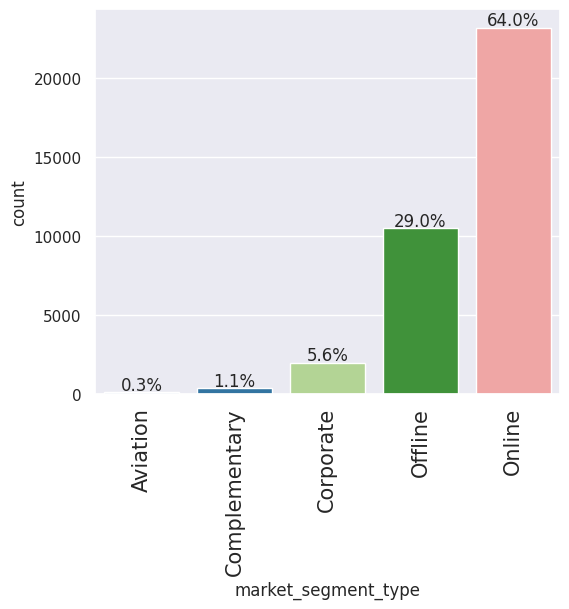

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "market_segment_type", perc=True)

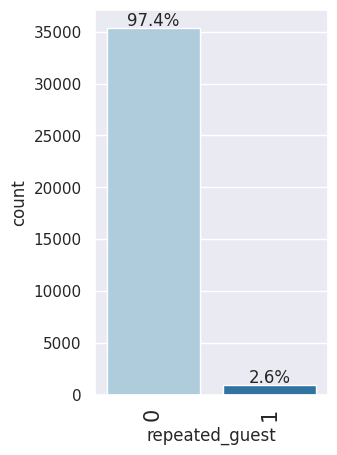

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "repeated_guest", perc=True)

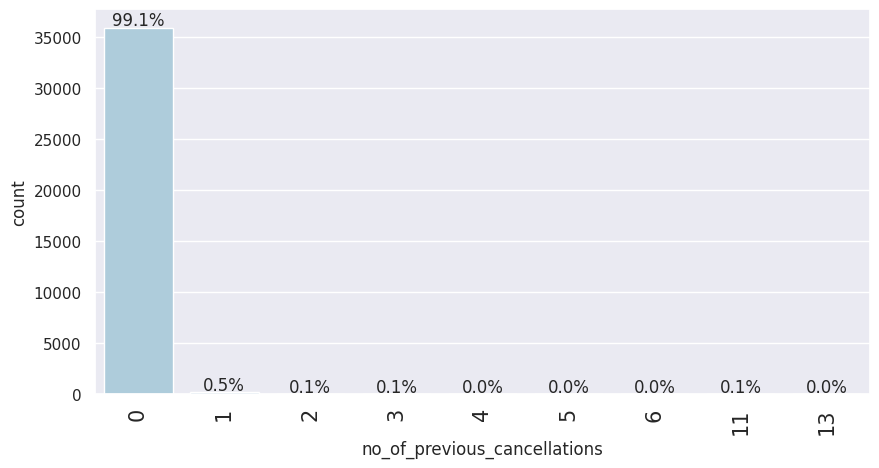

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "no_of_previous_cancellations", perc=True)

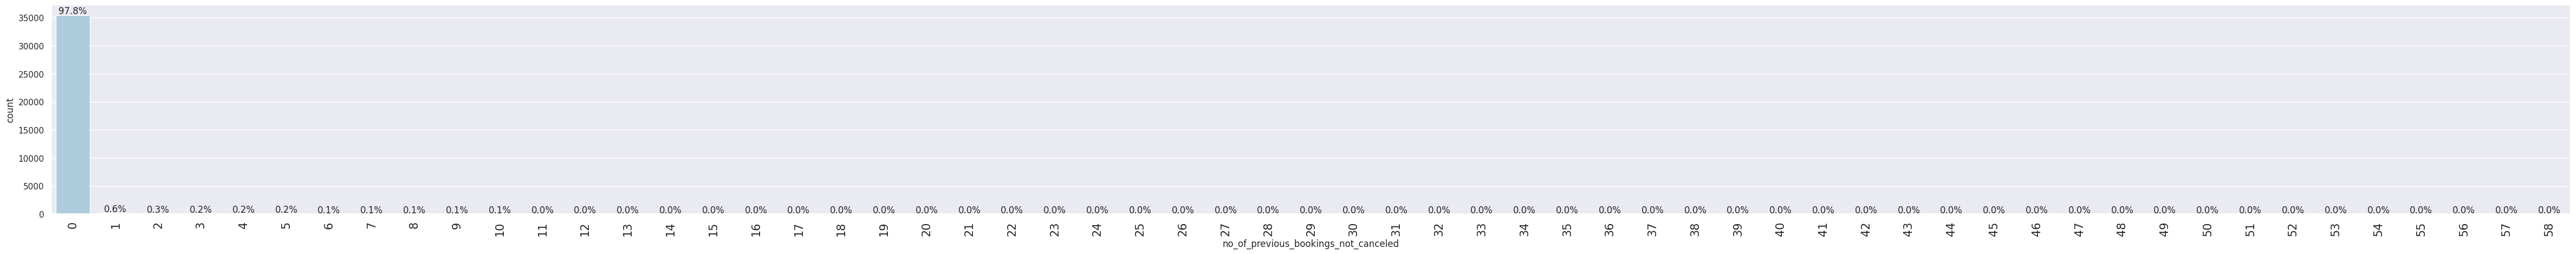

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "no_of_previous_bookings_not_canceled", perc=True)

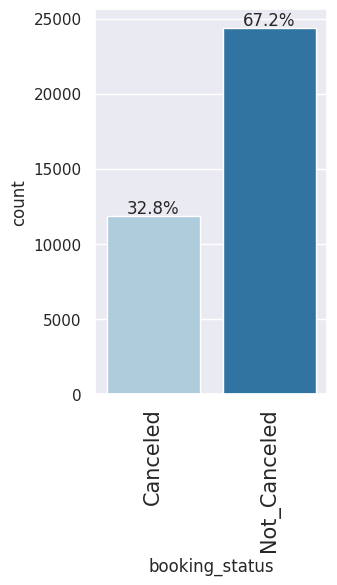

<IPython.core.display.Javascript object>

In [ ]:
# Plot barplot of os with percentage showing on each bar
labeled_barplot(cust_booking_data, "booking_status", perc=True)

## Bivariate analysis

**Correlation Check**

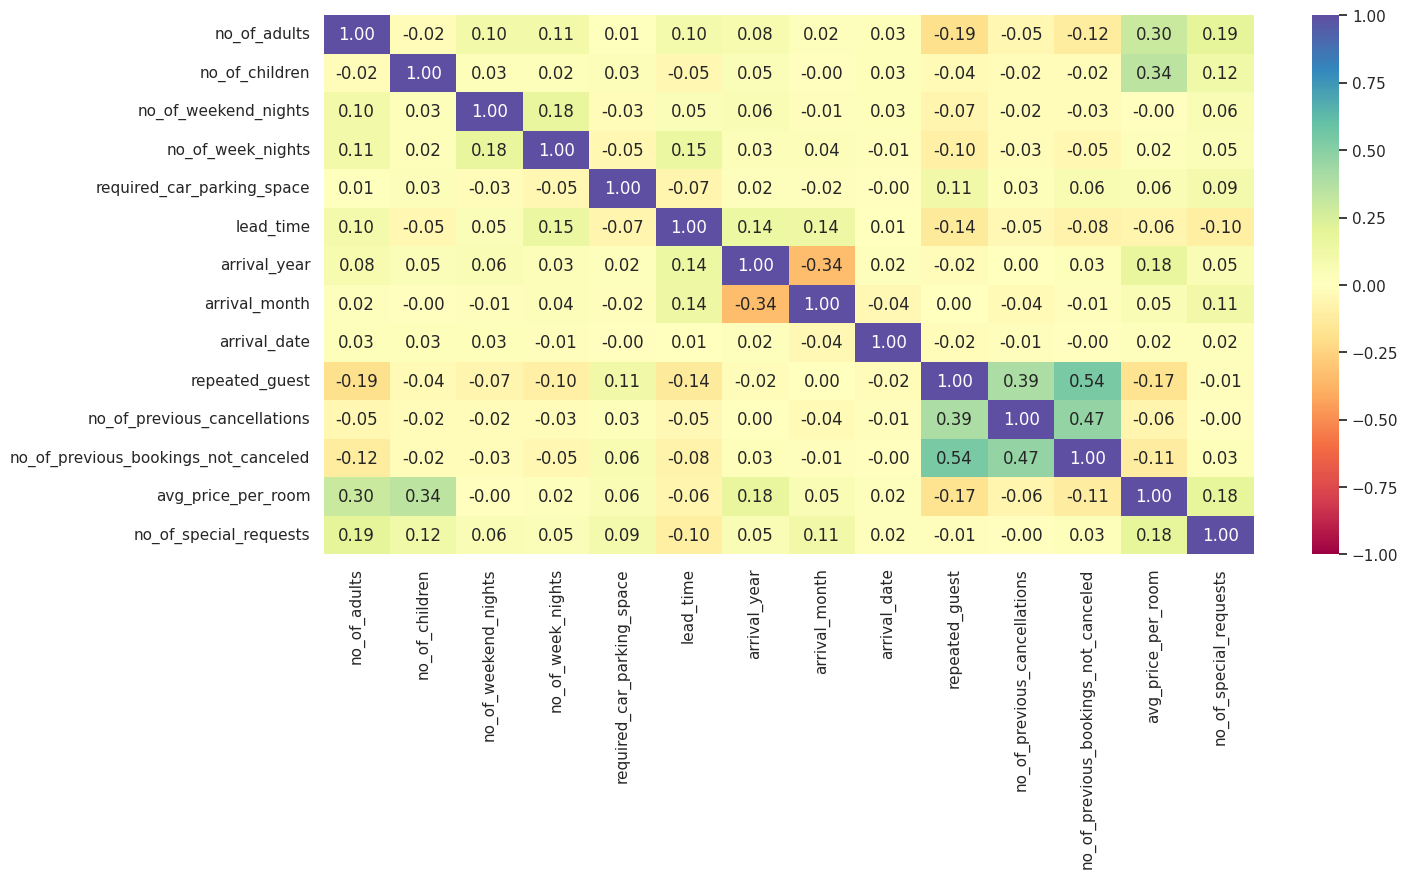

<IPython.core.display.Javascript object>

In [ ]:
cols_list = cust_booking_data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
# Dropping columns from the cols_list: cols_list.remove("type_of_meal_plan"), cols_list.remove("room_type_reserved"), cols_list.remove("market_segment_type") & cols_list.remove("booking_status")

plt.figure(figsize=(15, 7))
sns.heatmap(
    cust_booking_data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

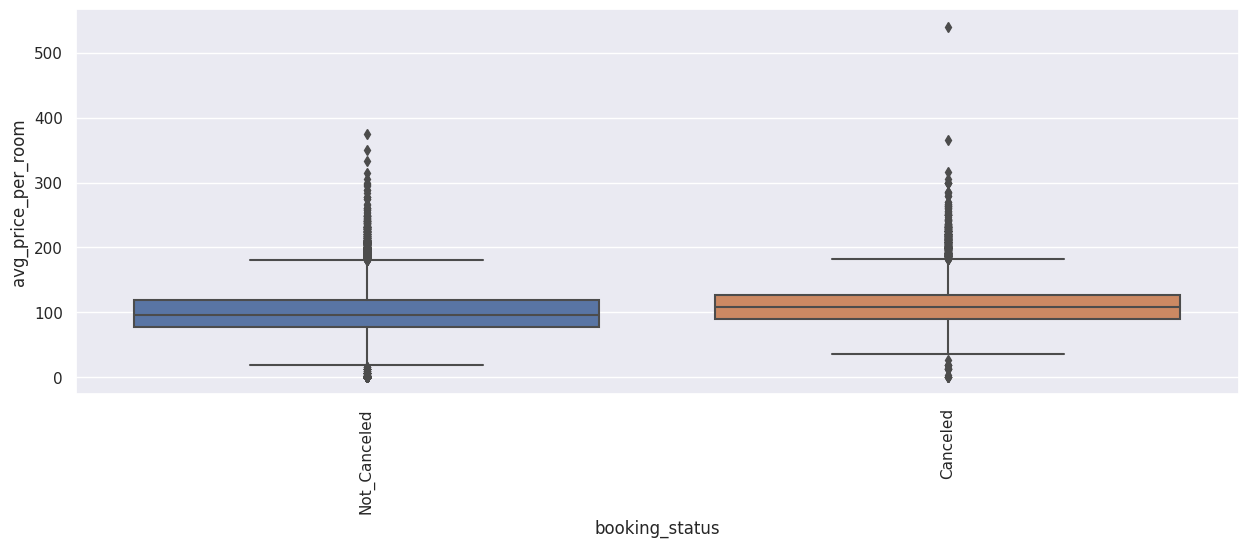

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cust_booking_data, x="booking_status", y="avg_price_per_room")
plt.xticks(rotation=90)
plt.show()

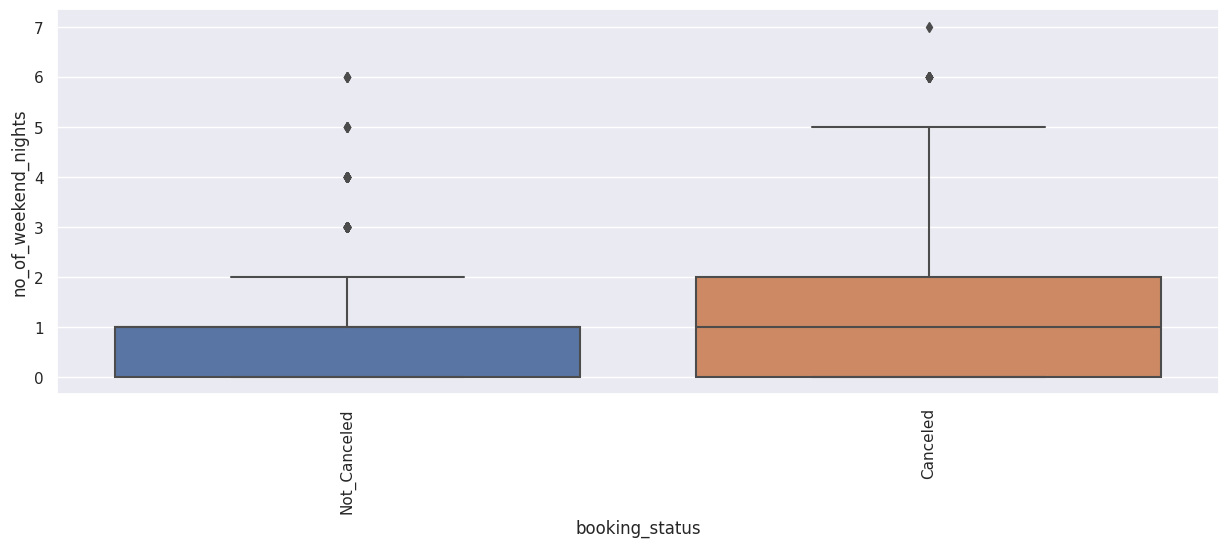

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cust_booking_data, x="booking_status", y="no_of_weekend_nights")
plt.xticks(rotation=90)
plt.show()

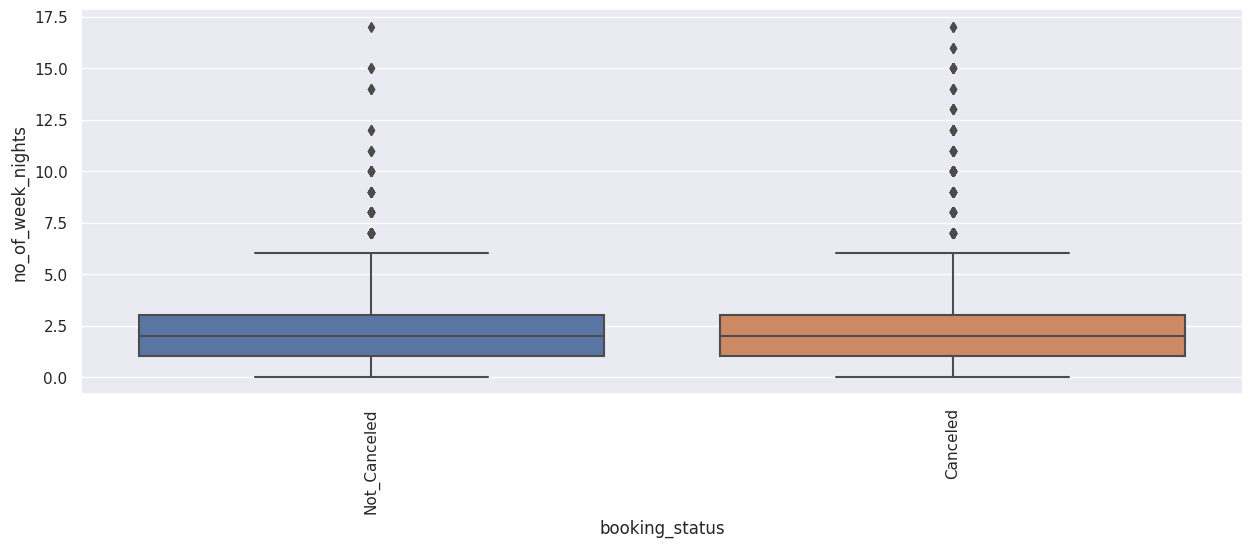

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cust_booking_data, x="booking_status", y="no_of_week_nights")
plt.xticks(rotation=90)
plt.show()

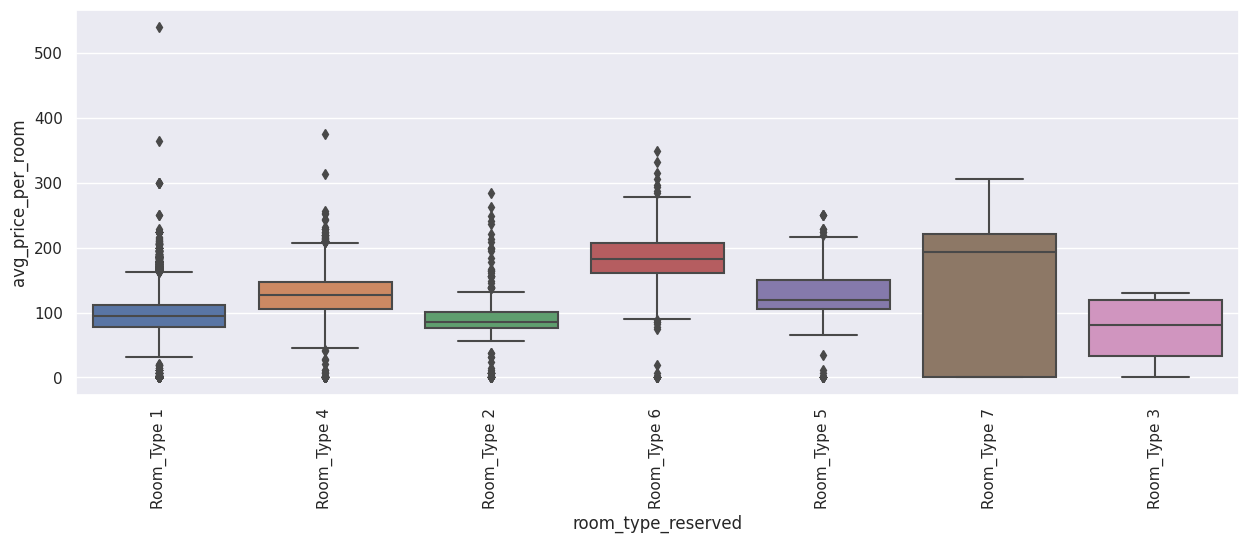

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cust_booking_data, x="room_type_reserved", y="avg_price_per_room")
plt.xticks(rotation=90)
plt.show()

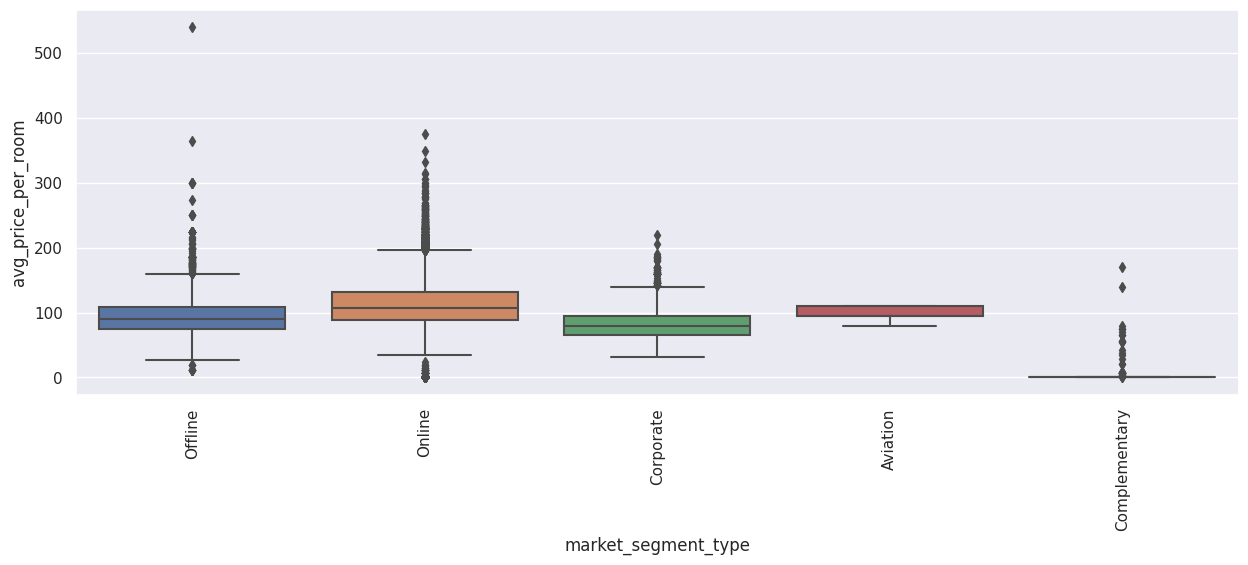

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cust_booking_data, x="market_segment_type", y="avg_price_per_room")
plt.xticks(rotation=90)
plt.show()

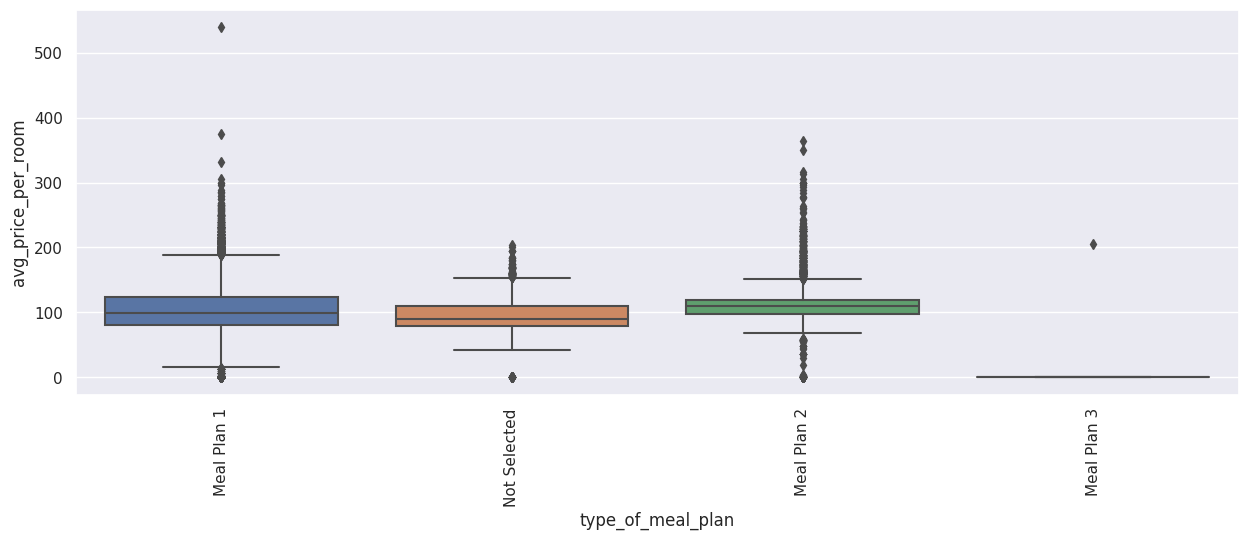

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=cust_booking_data, x="type_of_meal_plan", y="avg_price_per_room")
plt.xticks(rotation=90)
plt.show()

How price varies per room

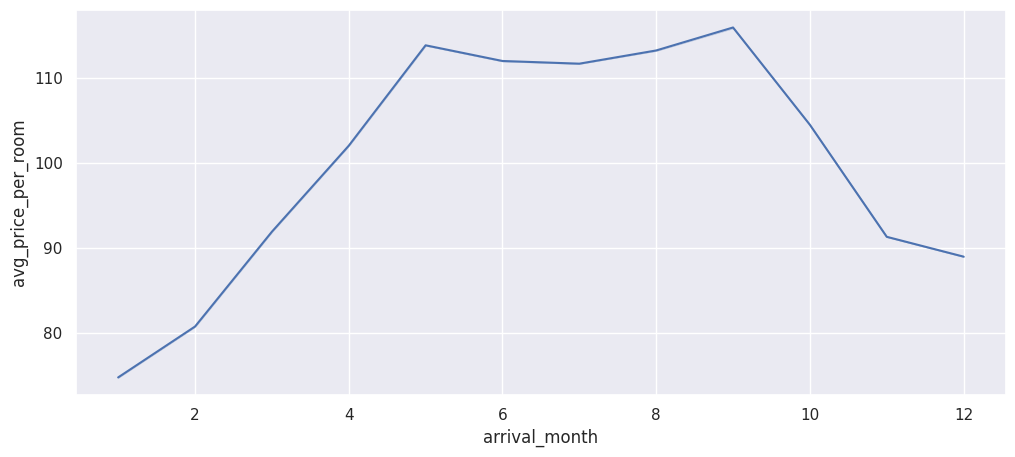

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=cust_booking_data, x="arrival_month", y="avg_price_per_room", errorbar=('ci', False))
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# let's create a copy of the data
cust_booking_data1 = cust_booking_data.copy()

<IPython.core.display.Javascript object>

In [ ]:
# checking for missing values
cust_booking_data1.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data1.isnull().values.any()

False

<IPython.core.display.Javascript object>

In [ ]:
cust_booking_data1.drop('Booking_ID', axis=1, inplace=True)
cust_booking_data1.drop('arrival_year', axis=1, inplace=True)
cust_booking_data1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [ ]:
# checking for missing values
cust_booking_data1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

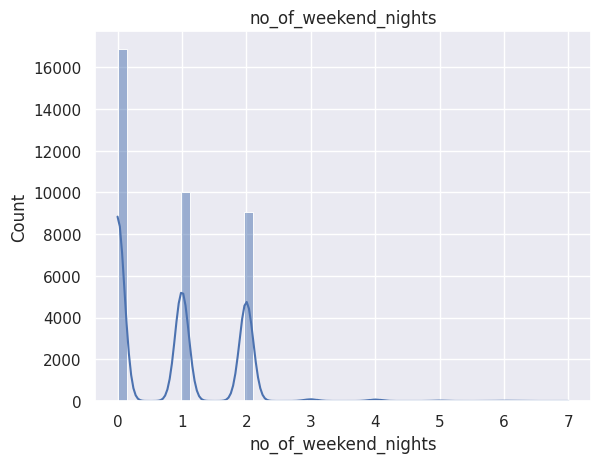

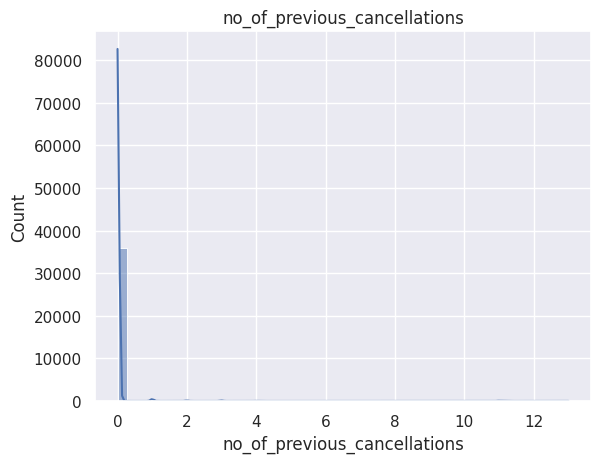

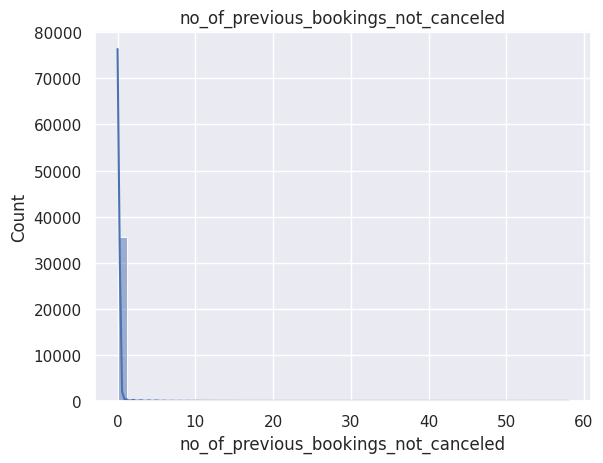

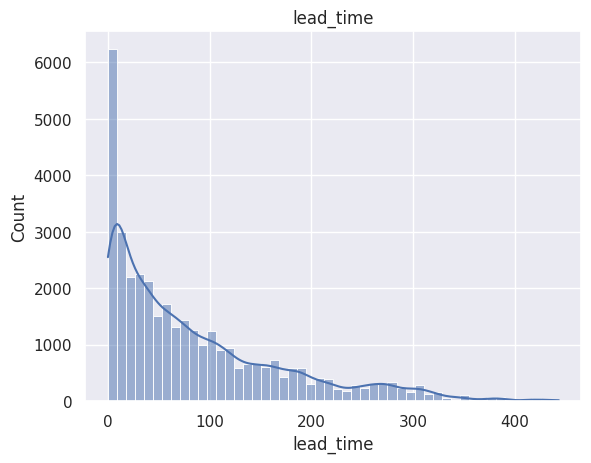

<IPython.core.display.Javascript object>

In [ ]:
# Plot of "cols_to_log" before log transformation
cols_to_log = [ 'no_of_weekend_nights', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'lead_time']

for colname in cols_to_log:
    sns.histplot(data = cust_booking_data1[colname], bins=50, kde=True)
    plt.title(colname)
    plt.show()

In [ ]:
# Log transformation
for colname in cols_to_log:
    cust_booking_data1[colname + "_log"] = np.log(cust_booking_data1[colname] + 1)

cust_booking_data1.drop(cols_to_log, axis=1, inplace=True)  # drop previous columns
cust_booking_data1.head()

,no_of_adults,no_of_children,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_weekend_nights_log,no_of_previous_cancellations_log,no_of_previous_bookings_not_canceled_log,lead_time_log
0,2,0,2,Meal Plan 1,0,Room_Type 1,10,2,Offline,0,65.00,0,Not_Canceled,0.693147,0.0,0.0,5.416100
1,2,0,3,Not Selected,0,Room_Type 1,11,6,Online,0,106.68,1,Not_Canceled,1.098612,0.0,0.0,1.791759
2,1,0,1,Meal Plan 1,0,Room_Type 1,2,28,Online,0,60.00,0,Canceled,1.098612,0.0,0.0,0.693147
3,2,0,2,Meal Plan 1,0,Room_Type 1,5,20,Online,0,100.00,0,Canceled,0.000000,0.0,0.0,5.356586
4,2,0,1,Not Selected,0,Room_Type 1,4,11,Online,0,94.50,0,Canceled,0.693147,0.0,0.0,3.891820


<IPython.core.display.Javascript object>

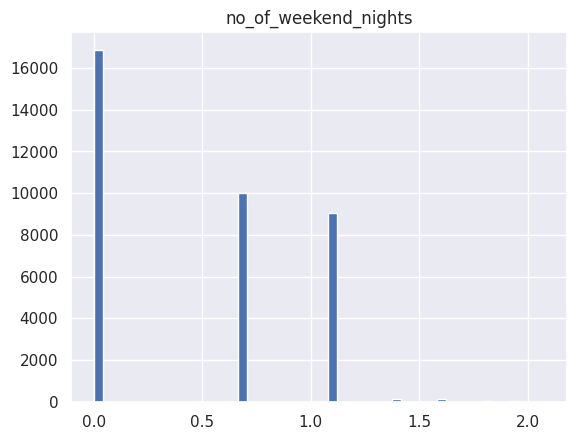

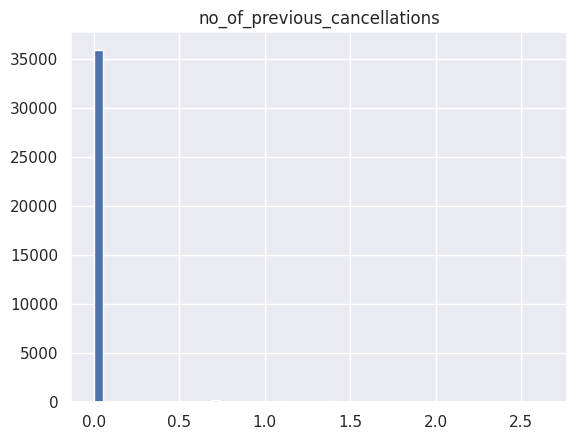

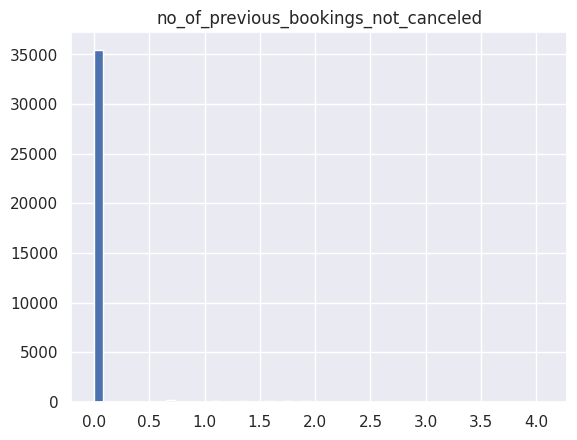

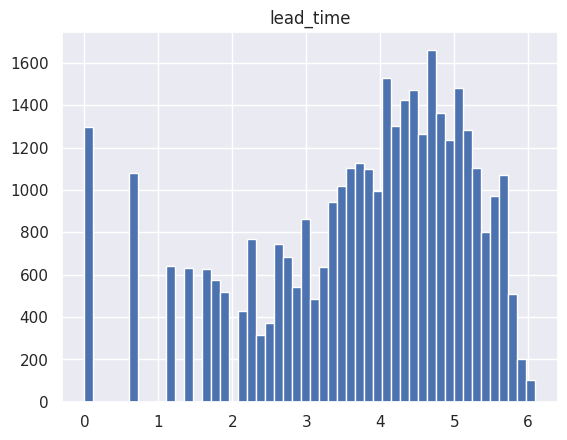

<IPython.core.display.Javascript object>

In [ ]:
# Plot after log transformation
for colname in cols_to_log:

    plt.hist(cust_booking_data1[colname + "_log"], bins=50)
    plt.title(colname)
    plt.show()



#### Outlier detection and treatment

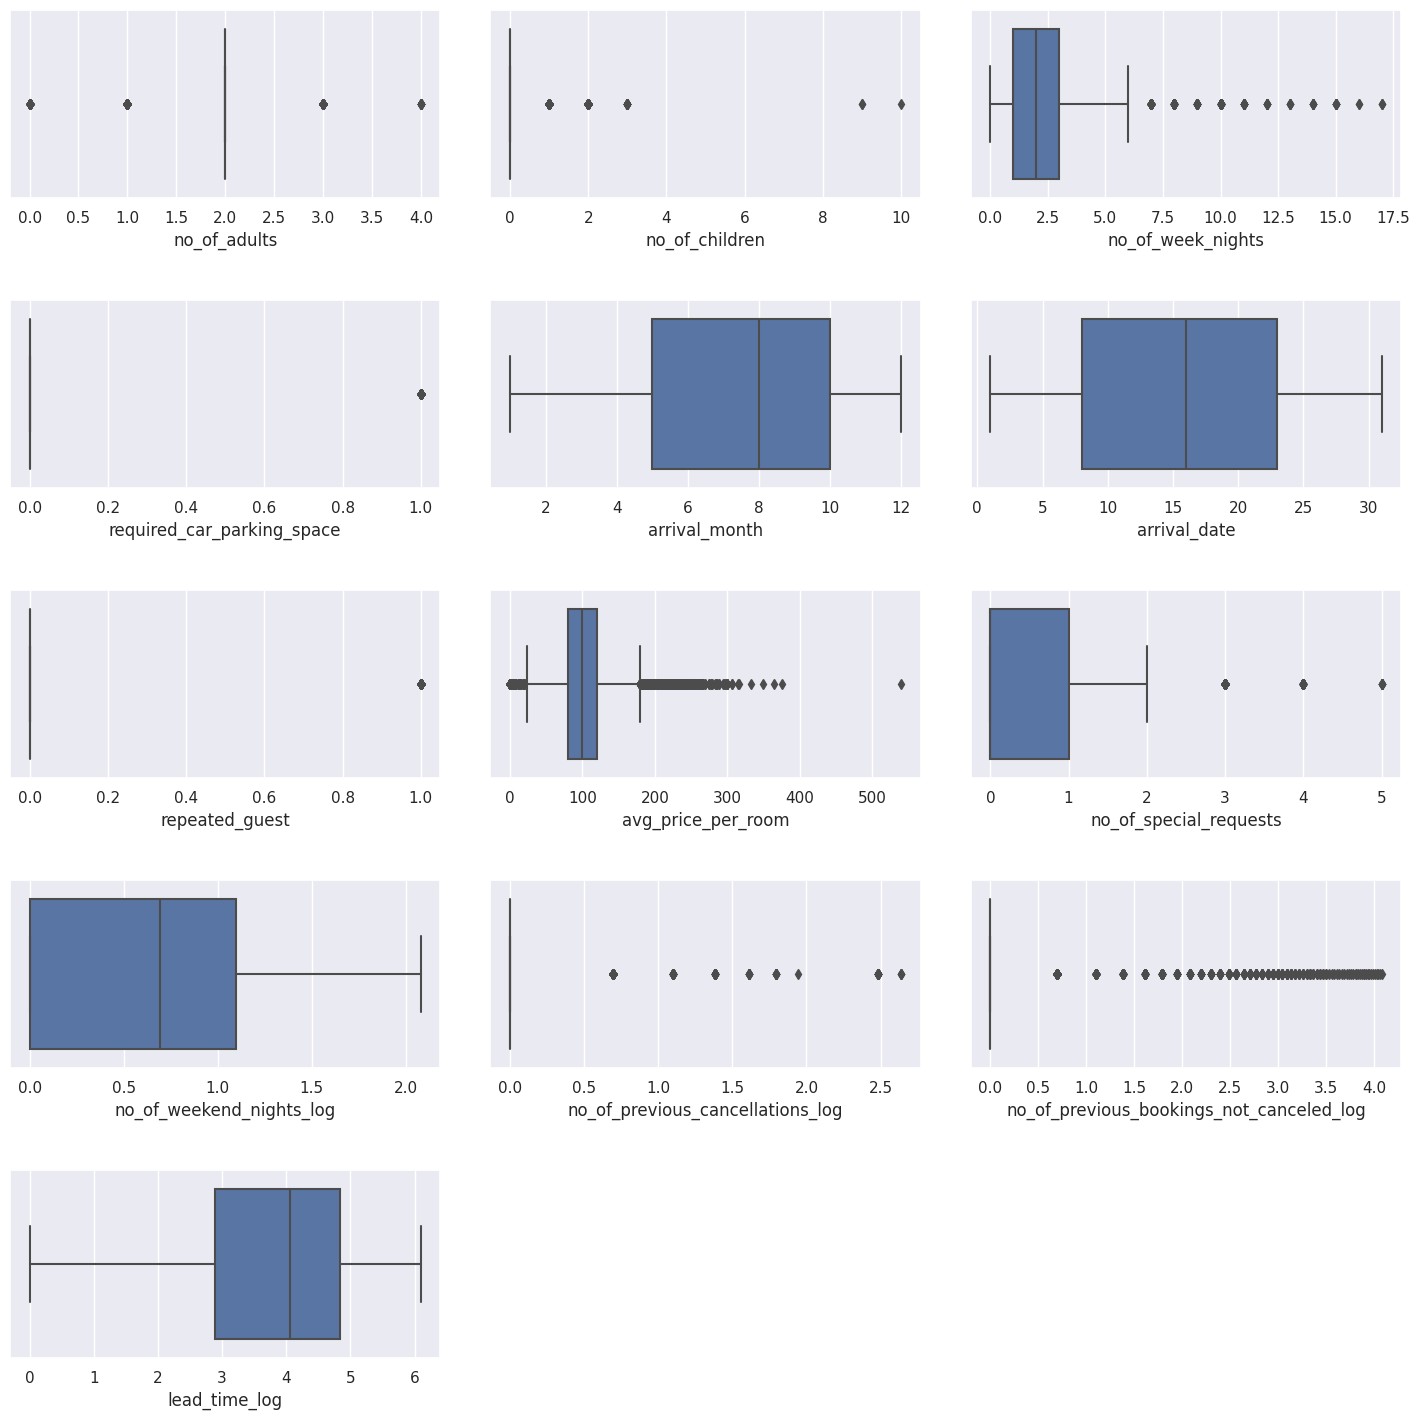

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = cust_booking_data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=cust_booking_data1, x=variable)
    plt.tight_layout(pad=3)

plt.show()

Although exceptions exist to in the data, adjustments will not be made to number of adults, number of children, number of weekend nights, umber of week nights, required car parking space, lead time, arrival month, , repeated guest, number of previous bookings not canceled, average price per room, number of special requests

In [ ]:
treat_num_cols = ["no_of_weekend_nights_log", "no_of_week_nights"]

<IPython.core.display.Javascript object>

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

cust_booking_data1 = treat_outliers_all(cust_booking_data1, treat_num_cols)

<IPython.core.display.Javascript object>

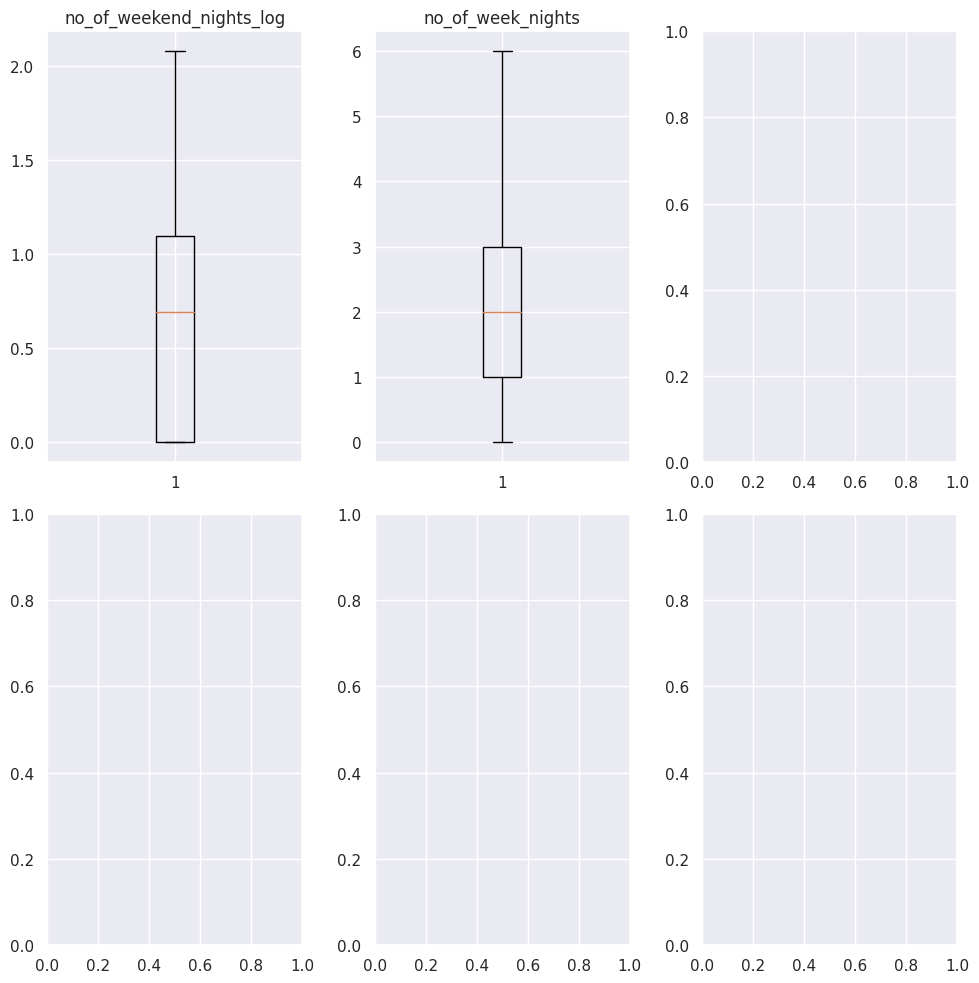

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i, variable in enumerate(treat_num_cols):
    ax = axes[i // 2, i % 3]
    ax.boxplot(cust_booking_data1[variable], whis=1.5)
    ax.set_title(variable)

plt.tight_layout()
plt.show()

In [ ]:
# outcome_will be set as 0 if a person cancels the booking and 1 if they don't

cust_booking_data1["booking_status"] = cust_booking_data1["booking_status"].apply(lambda x: 0 if x == "Canceled" else 1)


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
sns.set_style("darkgrid")
cust_booking_data1.histplot(figsize=(20, 15))
plt.show()

AttributeError: ignored

<IPython.core.display.Javascript object>

In [ ]:
sns.set_style("darkgrid")
cust_booking_data1.hist([(cust_booking_data1[np.isfinite(cust_booking_data1)])].values)
plt.show()

plt.hist(df[np.isfinite(df['distance'])].values)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
X = cust_booking_data1.drop(["booking_status"], axis=1)
Y = cust_booking_data1["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                       329.396070
no_of_adults                                  1.363083
no_of_children                                1.979342
no_of_week_nights                             1.107682
required_car_parking_space                    1.041650
arrival_month                                 1.043563
arrival_date                                  1.006400
repeated_guest                                3.349986
avg_price_per_room                            1.938886
no_of_special_requests                        1.244398
no_of_weekend_nights_log                      1.053969
no_of_previous_cancellations_log              1.596773
no_of_previous_bookings_not_canceled_log      3.505374
lead_time_log                                 1.325915
type_of_meal_plan_Meal Plan 2                 1.186115
type_of_meal_plan_Meal Plan 3                 1.025382
type_of_meal_plan_Not Selected                1.239712
room_type_reserved_Room_Type 2

<IPython.core.display.Javascript object>

In [ ]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                       46.300994
no_of_adults                                 1.348565
no_of_children                               1.978692
no_of_week_nights                            1.107170
required_car_parking_space                   1.041580
arrival_month                                1.043327
arrival_date                                 1.006389
repeated_guest                               3.345533
avg_price_per_room                           1.938387
no_of_special_requests                       1.239755
no_of_weekend_nights_log                     1.053577
no_of_previous_cancellations_log             1.596028
no_of_previous_bookings_not_canceled_log     3.505111
lead_time_log                                1.317253
type_of_meal_plan_Meal Plan 2                1.186012
type_of_meal_plan_Meal Plan 3                1.025382
type_of_meal_plan_Not Selected               1.238064
room_type_reserved_Room_Type 2               1.

<IPython.core.display.Javascript object>

In [ ]:
X_train2 = X_train1.drop("no_of_adults", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

## Building a Logistic Regression model

In [ ]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of booking status in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of booking status in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of booking status in training set:
1    0.670644
0    0.329356
Name: booking_status, dtype: float64
Percentage of booking status in test set:
1    0.676376
0    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.2992
Time:                        12:38:11   Log-Likelihood:                -11277.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.9173      0.277     14.140      0.000       3.374       4.460
no_of_adults                             

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>

## Model performance evaluation

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

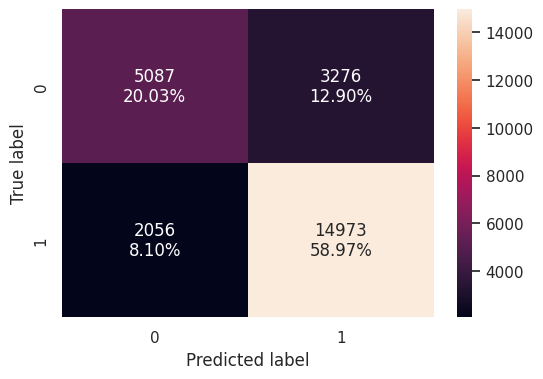

<IPython.core.display.Javascript object>

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


NameError: ignored

<IPython.core.display.Javascript object>

## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

NameError: ignored

<IPython.core.display.Javascript object>

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

## Building a Decision Tree model

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

NameError: ignored

<IPython.core.display.Javascript object>

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

## Do we need to prune the tree?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?